# Data Preparation

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

In [ ]:
# loads the data
loan_data_backup=pd.read_csv('/content/drive/MyDrive/Projects/Credit_Risk_Modeling_in_Python/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
loan_data = loan_data_backup.copy()

## Explore Data

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_columns = None

In [ ]:
loan_data.head(2)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   
1   60 months     15.27        59.83     C        C4     Ryder   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  
0          NaN           NaN  
1          NaN           NaN

In [ ]:
# Displays all column names.
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [ ]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing continuous variables

In [ ]:
# Displays unique values of column 'emp_length'.
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# Preprocessing ‘employment length’ variable in a new variable called ‘employment length int’
# Assigns the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’ replaced with nothing.
# Next, replaces the whole string ‘less than 1 year’ with the string ‘0’.
# Replaces the ‘n/a’ string with the string ‘0’. Then, replaces the string ‘space years’ with nothing.
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

str

In [ ]:
# Transforms the employment length column to numeric.
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [ ]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

numpy.float64

In [ ]:
# Displays column.
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [ ]:
# Extracts the date and the time and assumes 
# 2017-12-01 as the last date in the data.
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [ ]:
# Checks the datatype of a single element of a column.
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Dates after 2017 will need cleaning
loan_data['earliest_cr_line_date'].max()

Timestamp('2068-12-01 00:00:00')

In [ ]:
# Calculates the difference between two dates and times.
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [ ]:
# Calculates the difference between two dates in months, turns it to numeric datatype and rounds it.
# Saves the result in a new variable.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [ ]:
# Descriptive statistics.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
# Takes three columns from the dataframe and displays them only for the rows where a variable has negative value.
# There are 2303 strange negative values.
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [ ]:
# Sets the rows that had negative differences to the maximum value.
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Calculates and shows the minimum value of a column.
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [ ]:
max(loan_data['mths_since_earliest_cr_line'])

587.0

In [ ]:
# Returns 'Term' column description
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [ ]:
# Returns 'Term' column unique values
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# Changes 'term_int' values to numbers
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [ ]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [ ]:
type(loan_data['term_int'][0])

str

In [ ]:
# Changes 'term_int' column to numeric data type 
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [ ]:
# Checks 'term_int' data type
type(loan_data['term_int'][0])

numpy.int64

In [ ]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [ ]:
# Transforms 'issue_d_date' to date type
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

# Creates new variable for months since issue date
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

# Returns description of new 'mths_since_issue_d' column
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing discrete variables

In [ ]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

The following discrete variables will be preprocessed: 

*grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status.* 

Most likely, column sub_grade will not be used, as it overlaps with grade.

In [ ]:
# Creates dummy variables for the discrete columns
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [ ]:
# Concatenates the dummy variables in a dataframe.
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [ ]:
# Returns the type of the variable.
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [ ]:
# Concatenates the dummy variables with original data 
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [ ]:
# Displays all column names.
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values

In [ ]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [ ]:
# 'Total revolving high credit/credit limit'
# it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [ ]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [ ]:
# Fills the missing values with the mean value of the non-missing values.
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [ ]:
# Fills the remaining missing values with zeroes.
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# PD model

## Data preparation

### Dependent Variable. 

Default and Non-default Accounts.

In [ ]:
# Displays unique values of column loan status.
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
# Calculates the number of observations for each unique value of a variable.
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
# Divides the number of observations for each unique value of a variable by the total number of observations.
# Proportions of observations for each unique value of a variable are calculated.
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [ ]:
# Good/ Bad Definition
# Creates a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.
# Defaulted loans are 0 and loans in good standing or paid off are 1
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [ ]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [ ]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

### Splitting Data

In [ ]:
# Imports train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [ ]:
# Displays the shape of the training inputs.
loan_data_inputs_train.shape

(373028, 207)

In [ ]:
# Displays the size of the training targets.
loan_data_targets_train.shape

(373028,)

In [ ]:
# Displays the size of the  testing inputs.
loan_data_inputs_test.shape

(93257, 207)

In [ ]:
# Displays the size of the testing targets.
loan_data_targets_test.shape

(93257,)

### Preprocessing Discrete Variables

Weight of Evidence:  $WoE$

Information Value: $IV$

In [ ]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [ ]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.727958    0.007115    1932.0    722.0     0.005815   
1     F   10530   0.754416    0.028228    7944.0   2586.0     0.023910   
2     E   28612   0.805257    0.076702   23040.0   5572.0     0.069345   
3     D   61498   0.846304    0.164862   52046.0   9452.0     0.156647   
4     C  100245   0.885770    0.268733   88794.0  11451.0     0.267251   
5     B  109730   0.921015    0.294160  101063.0   8667.0     0.304178   
6     A   59759   0.961044    0.160200   57431.0   2328.0     0.172855   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017706 -1.113459             NaN       NaN  0.288636  
1    0.063417 -0.975440        0.026458  0.138019  0.288636  
2    0.136642 -0.678267        0.050841  0.297173  0.288636  
3    0.231792 -0.391843        0.041047  0.286424  0.288636  
4    0.280813 -0.049503        0.039466  0.342340  0.288636  
5    0.212541  0.358476        0.035245  0.407979  0.288636  
6    0.057090  1.107830        0.040028  0.749353  0.288636

#### Preprocessing Discrete Variables: Visualizing Results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style of the graphs to the seaborn style.
sns.set()

In [ ]:
# This function displays a graph of WoE.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

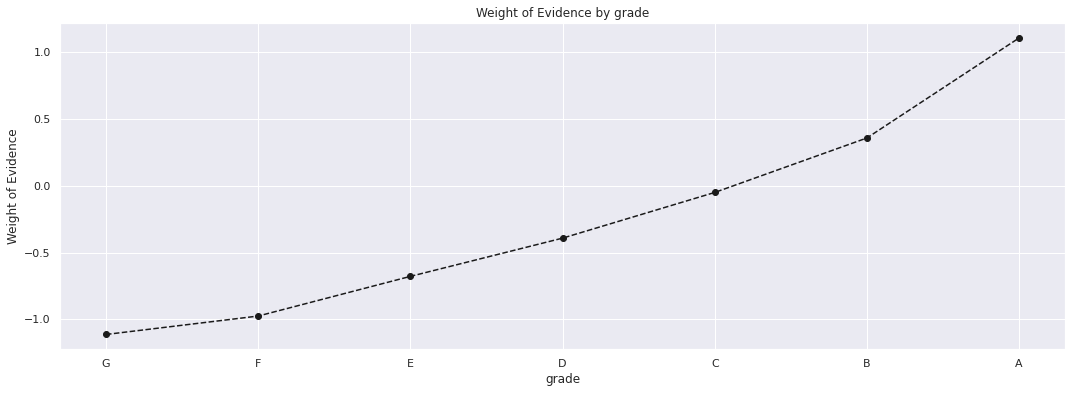

In [ ]:
# 'grade'

plot_by_woe(df_temp)

In [ ]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.873870    0.403720  131604.0  18995.0   
3            OWN   33295   0.892536    0.089256   29717.0   3578.0   
4       MORTGAGE  188956   0.903835    0.506546  170785.0  18171.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000328    0.000687 -0.738602             NaN       NaN  inf  
1     0.000102    0.000147 -0.363144        0.054380  0.375458  inf  
2     0.396099    0.465815 -0.162123        0.023870  0.201021  inf  
3     0.089442    0.087743  0.019170        0.018666  0.181294  inf  
4     0.514026    0.445608  0.142834        0.011298  0.123663  inf  
5     0.000003    0.000000       inf        0.096165       inf  inf

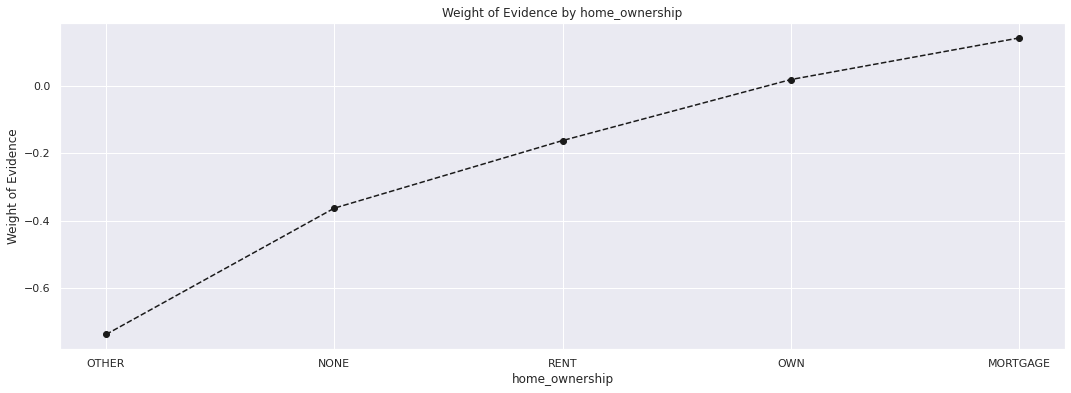

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Combines multiple home_ownership variables into one
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [ ]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.873870    0.403720  131604.0  18995.0   
3            OWN   33295   0.892536    0.089256   29717.0   3578.0   
4       MORTGAGE  188956   0.903835    0.506546  170785.0  18171.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000328    0.000687 -0.738602             NaN       NaN  inf  
1     0.000102    0.000147 -0.363144        0.054380  0.375458  inf  
2     0.396099    0.465815 -0.162123        0.023870  0.201021  inf  
3     0.089442    0.087743  0.019170        0.018666  0.181294  inf  
4     0.514026    0.445608  0.142834        0.011298  0.123663  inf  
5     0.000003    0.000000       inf        0.096165       inf  inf

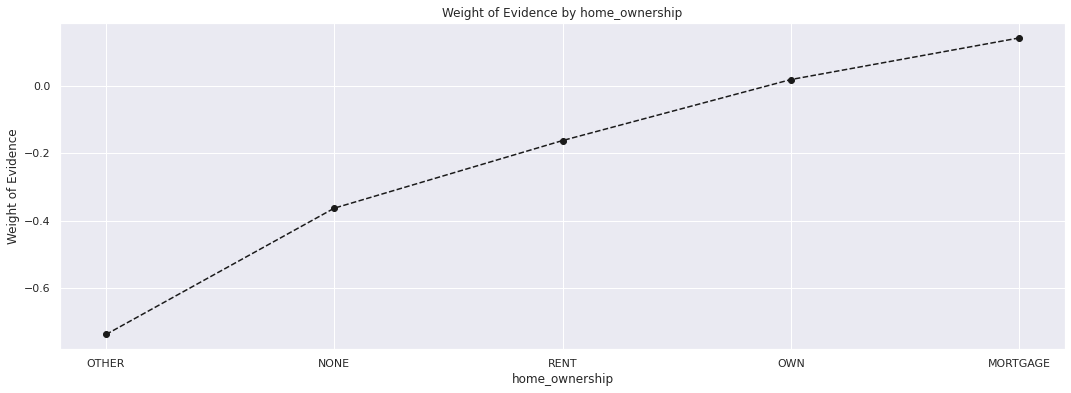

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)

df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.864585    0.013996   4514.0   707.0     0.013586   
3          FL  25211   0.875808    0.067585  22080.0  3131.0     0.066456   
4          HI   2001   0.877061    0.005364   1755.0   246.0     0.005282   
5          AL   4671   0.877328    0.012522   4098.0   573.0     0.012334   
6          NM   2075   0.883373    0.005563   1833.0   242.0     0.005517   
7          VA  11366   0.883864    0.030470  10046.0  1320.0     0.030236   
8          NY  32211   0.883984    0.086350  28474.0  3737.0     0.085701   
9          OK   3284   0.884287    0.008804   2904.0   380.0     0.008740   
10         TN   4845   0.884623    0.012988   4286.0   559.0     0.012900   
11         MO   6017   0.884660    0.016130   5323.0   694.0     0.016021   
12         LA   4359   0.885295    0.011685   3859.0   500.0     0.011615   
13         MD   8771   0.885418    0.023513   7766.0  1005.0     0.023374   
14         NC  10204   0.885633    0.027355   9037.0  1167.0     0.027199   
15         CA  57199   0.885645    0.153337  50658.0  6541.0     0.152470   
16         UT   2756   0.887155    0.007388   2445.0   311.0     0.007359   
17         KY   3587   0.887650    0.009616   3184.0   403.0     0.009583   
18         AZ   8645   0.888259    0.023175   7679.0   966.0     0.023112   
19         NJ  14385   0.888286    0.038563  12778.0  1607.0     0.038459   
20         AR   2760   0.889855    0.007399   2456.0   304.0     0.007392   
21         MI   9191   0.890436    0.024639   8184.0  1007.0     0.024632   
22         PA  13090   0.890451    0.035091  11656.0  1434.0     0.035082   
23         OH  12135   0.890894    0.032531  10811.0  1324.0     0.032539   
24         MN   6526   0.891358    0.017495   5817.0   709.0     0.017508   
25         RI   1647   0.893139    0.004415   1471.0   176.0     0.004427   
26         MA   8858   0.893543    0.023746   7915.0   943.0     0.023822   
27         DE   1064   0.893797    0.002852    951.0   113.0     0.002862   
28         SD    801   0.893883    0.002147    716.0    85.0     0.002155   
29         IN   5210   0.894050    0.013967   4658.0   552.0     0.014020   
30         GA  11960   0.896990    0.032062  10728.0  1232.0     0.032289   
31         WA   8372   0.897157    0.022443   7511.0   861.0     0.022606   
32         OR   4814   0.897590    0.012905   4321.0   493.0     0.013005   
33         WI   4740   0.899789    0.012707   4265.0   475.0     0.012837   
34         MT   1103   0.901179    0.002957    994.0   109.0     0.002992   
35         TX  29158   0.903800    0.078166  26353.0  2805.0     0.079317   
36         IL  14833   0.904874    0.039764  13422.0  1411.0     0.040397   
37         CT   5775   0.905455    0.015481   5229.0   546.0     0.015738   
38         KS   3360   0.908036    0.009007   3051.0   309.0     0.009183   
39         SC   4448   0.909173    0.011924   4044.0   404.0     0.012172   
40         CO   7823   0.909242    0.020972   7113.0   710.0     0.021409   
41         VT    727   0.910591    0.001949    662.0    65.0     0.001992   
42         AK   1003   0.911266    0.002689    914.0    89.0     0.002751   
43         MS    980   0.912245    0.002627    894.0    86.0     0.002691   
44         WV   1926   0.920042    0.005163   1772.0   154.0     0.005333   
45         NH   1830   0.921858    0.004906   1687.0   143.0     0.005078   
46         WY    919   0.928183    0.002464    853.0    66.0     0.002567   
47         DC   1129   0.934455    0.003027   1055.0    74.0     0.003175   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -2

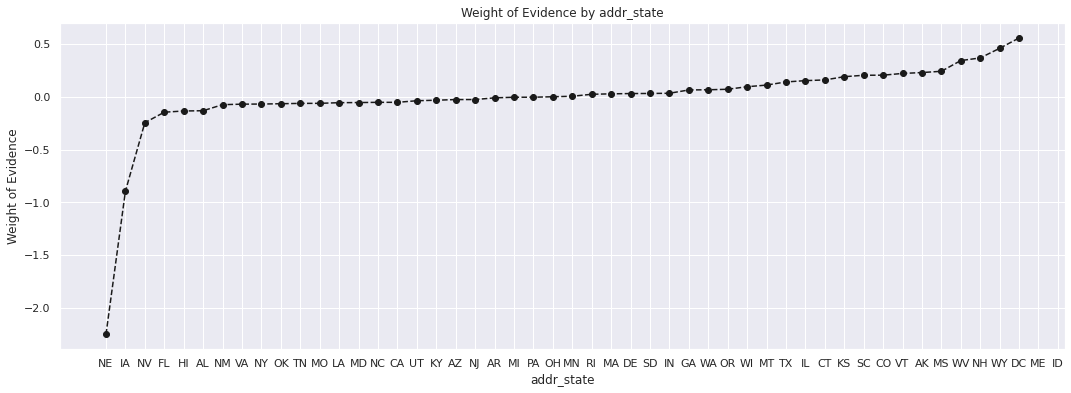

In [ ]:
plot_by_woe(df_temp)

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)

df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.864585    0.013996   4514.0   707.0     0.013586   
3          FL  25211   0.875808    0.067585  22080.0  3131.0     0.066456   
4          HI   2001   0.877061    0.005364   1755.0   246.0     0.005282   
5          AL   4671   0.877328    0.012522   4098.0   573.0     0.012334   
6          NM   2075   0.883373    0.005563   1833.0   242.0     0.005517   
7          VA  11366   0.883864    0.030470  10046.0  1320.0     0.030236   
8          NY  32211   0.883984    0.086350  28474.0  3737.0     0.085701   
9          OK   3284   0.884287    0.008804   2904.0   380.0     0.008740   
10         TN   4845   0.884623    0.012988   4286.0   559.0     0.012900   
11         MO   6017   0.884660    0.016130   5323.0   694.0     0.016021   
12         LA   4359   0.885295    0.011685   3859.0   500.0     0.011615   
13         MD   8771   0.885418    0.023513   7766.0  1005.0     0.023374   
14         NC  10204   0.885633    0.027355   9037.0  1167.0     0.027199   
15         CA  57199   0.885645    0.153337  50658.0  6541.0     0.152470   
16         UT   2756   0.887155    0.007388   2445.0   311.0     0.007359   
17         KY   3587   0.887650    0.009616   3184.0   403.0     0.009583   
18         AZ   8645   0.888259    0.023175   7679.0   966.0     0.023112   
19         NJ  14385   0.888286    0.038563  12778.0  1607.0     0.038459   
20         AR   2760   0.889855    0.007399   2456.0   304.0     0.007392   
21         MI   9191   0.890436    0.024639   8184.0  1007.0     0.024632   
22         PA  13090   0.890451    0.035091  11656.0  1434.0     0.035082   
23         OH  12135   0.890894    0.032531  10811.0  1324.0     0.032539   
24         MN   6526   0.891358    0.017495   5817.0   709.0     0.017508   
25         RI   1647   0.893139    0.004415   1471.0   176.0     0.004427   
26         MA   8858   0.893543    0.023746   7915.0   943.0     0.023822   
27         DE   1064   0.893797    0.002852    951.0   113.0     0.002862   
28         SD    801   0.893883    0.002147    716.0    85.0     0.002155   
29         IN   5210   0.894050    0.013967   4658.0   552.0     0.014020   
30         GA  11960   0.896990    0.032062  10728.0  1232.0     0.032289   
31         WA   8372   0.897157    0.022443   7511.0   861.0     0.022606   
32         OR   4814   0.897590    0.012905   4321.0   493.0     0.013005   
33         WI   4740   0.899789    0.012707   4265.0   475.0     0.012837   
34         MT   1103   0.901179    0.002957    994.0   109.0     0.002992   
35         TX  29158   0.903800    0.078166  26353.0  2805.0     0.079317   
36         IL  14833   0.904874    0.039764  13422.0  1411.0     0.040397   
37         CT   5775   0.905455    0.015481   5229.0   546.0     0.015738   
38         KS   3360   0.908036    0.009007   3051.0   309.0     0.009183   
39         SC   4448   0.909173    0.011924   4044.0   404.0     0.012172   
40         CO   7823   0.909242    0.020972   7113.0   710.0     0.021409   
41         VT    727   0.910591    0.001949    662.0    65.0     0.001992   
42         AK   1003   0.911266    0.002689    914.0    89.0     0.002751   
43         MS    980   0.912245    0.002627    894.0    86.0     0.002691   
44         WV   1926   0.920042    0.005163   1772.0   154.0     0.005333   
45         NH   1830   0.921858    0.004906   1687.0   143.0     0.005078   
46         WY    919   0.928183    0.002464    853.0    66.0     0.002567   
47         DC   1129   0.934455    0.003027   1055.0    74.0     0.003175   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -2

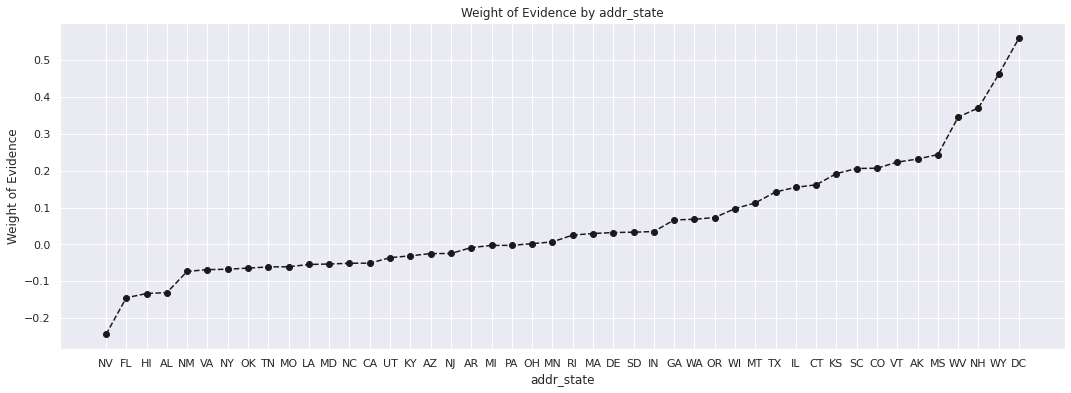

In [ ]:
plot_by_woe(df_temp.iloc[2: -2, : ])

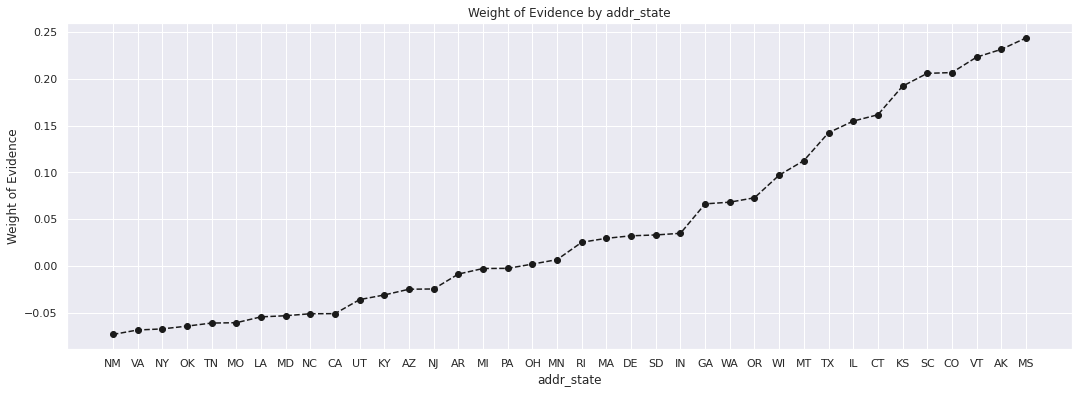

In [ ]:
plot_by_woe(df_temp.iloc[6: -6, : ])

In [ ]:
# Creates the following categories groups:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'


df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [ ]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)

df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134414   0.872781    0.360332  117314.0  17100.0   
1     Source Verified  120030   0.895918    0.321772  107537.0  12493.0   
2        Not Verified  118584   0.905679    0.317896  107399.0  11185.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353090    0.419344 -0.171969             NaN       NaN  0.020384  
1     0.323663    0.306366  0.054922        0.023137  0.226891  0.020384  
2     0.323248    0.274290  0.164232        0.009761  0.109311  0.020384

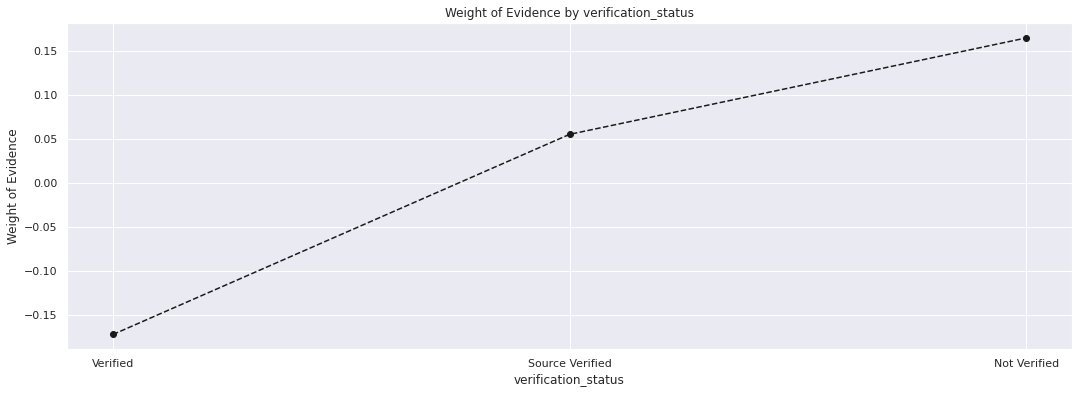

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5582   0.786098    0.014964    4388.0   1194.0   
1          educational     333   0.801802    0.000893     267.0     66.0   
2               moving    2392   0.839465    0.006412    2008.0    384.0   
3                house    1830   0.860109    0.004906    1574.0    256.0   
4                other   18884   0.862264    0.050624   16283.0   2601.0   
5     renewable_energy     281   0.864769    0.000753     243.0     38.0   
6              medical    3684   0.868350    0.009876    3199.0    485.0   
7              wedding    1887   0.881823    0.005059    1664.0    223.0   
8             vacation    1991   0.882471    0.005337    1757.0    234.0   
9   debt_consolidation  219183   0.886884    0.587578  194390.0  24793.0   
10    home_improvement   21238   0.900697    0.056934   19129.0   2109.0   
11      major_purchase    7837   0.905449    0.021009    7096.0    741.0   
12                 car    4325   0.909595    0.011594    3934.0    391.0   
13         credit_card   83581   0.913102    0.224061   76318.0   7263.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013207    0.029280 -0.796180             NaN       NaN  0.035418  
1      0.000804    0.001619 -0.700151        0.015704  0.096029  0.035418  
2      0.006044    0.009417 -0.443493        0.037663  0.256658  0.035418  
3      0.004737    0.006278 -0.281547        0.020644  0.161946  0.035418  
4      0.049008    0.063784 -0.263519        0.002155  0.018028  0.035418  
5      0.000731    0.000932 -0.242270        0.002504  0.021250  0.035418  
6      0.009628    0.011894 -0.211300        0.003581  0.030969  0.035418  
7      0.005008    0.005469 -0.087937        0.013473  0.123363  0.035418  
8      0.005288    0.005738 -0.081703        0.000648  0.006234  0.035418  
9      0.585071    0.607999 -0.038440        0.004413  0.043263  0.035418  
10     0.057574    0.051719  0.107247        0.013812  0.145687  0.035418  
11     0.021357    0.018172  0.161541        0.004752  0.054294  0.035418  
12     0.011840    0.009589  0.210959        0.004147  0.049419  0.035418  
13     0.229701    0.178111  0.254371        0.003507  0.043411  0.035418

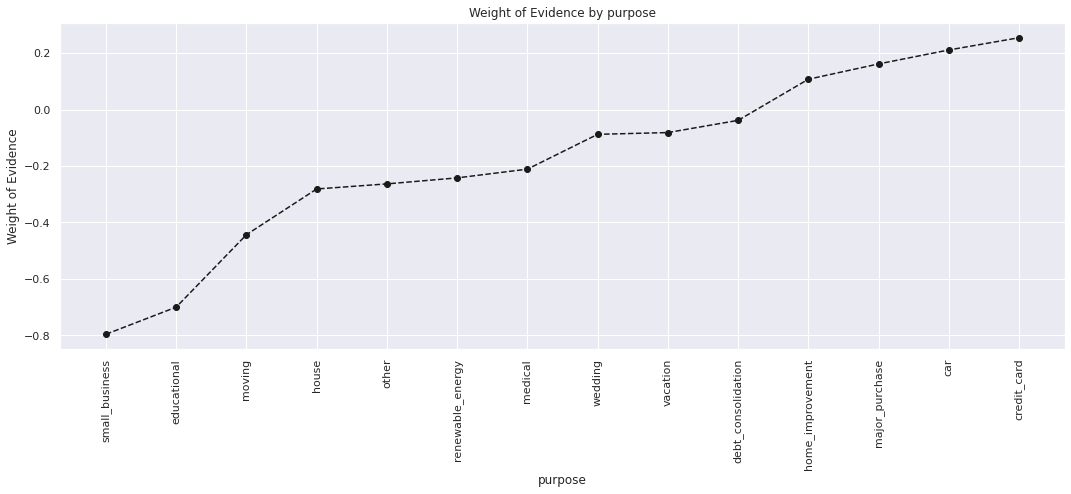

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Combines 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# Combines 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# Combines 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.

df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [ ]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242514   0.879694    0.650123  213338.0  29176.0   
1                   w  130514   0.911105    0.349877  118912.0  11602.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.642101    0.715484 -0.108214             NaN       NaN  0.02478  
1     0.357899    0.284516  0.229461        0.031412  0.337675  0.02478

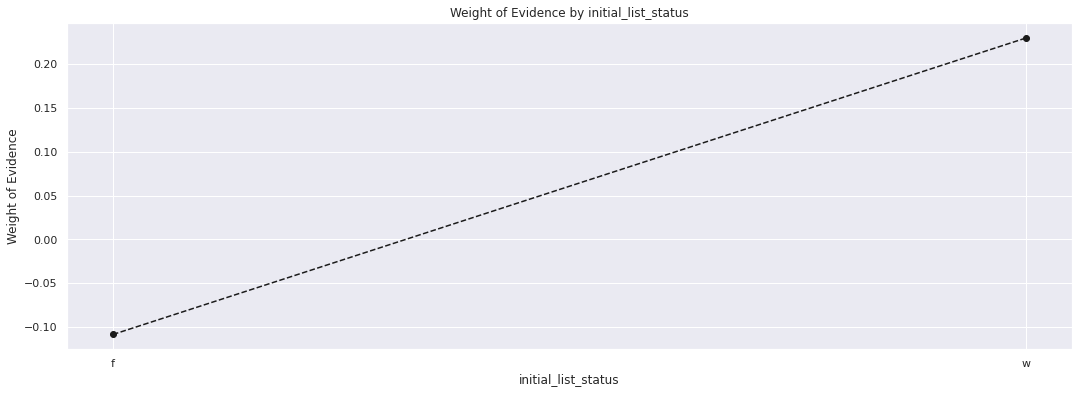

In [ ]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables

In [ ]:
# WoE function for ordered continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
# term
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)

df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  270419   0.902995    0.724929  244187.0  26232.0      0.73495   
1        60  102609   0.858239    0.275071   88063.0  14546.0      0.26505   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.643288  0.133209             NaN       NaN  0.039434  
1    0.356712 -0.297009        0.044756  0.430218  0.039434

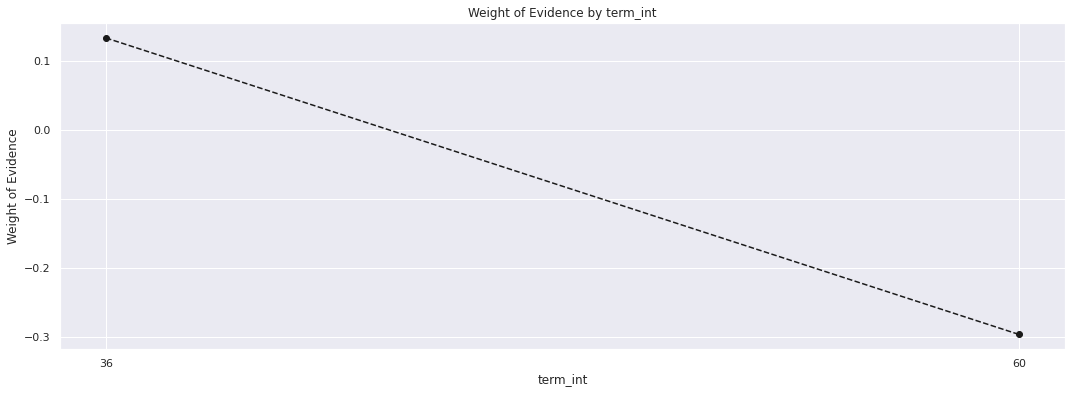

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Creates dummy variables for loan terms
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [ ]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)

df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   45720   0.876400    0.122565   40069.0   5651.0   
1              1.0   23654   0.886996    0.063411   20981.0   2673.0   
2              2.0   33078   0.890955    0.088674   29471.0   3607.0   
3              3.0   29205   0.890772    0.078292   26015.0   3190.0   
4              4.0   22468   0.890644    0.060231   20011.0   2457.0   
5              5.0   24602   0.884725    0.065952   21766.0   2836.0   
6              6.0   20887   0.883899    0.055993   18462.0   2425.0   
7              7.0   21049   0.887453    0.056427   18680.0   2369.0   
8              8.0   17853   0.889878    0.047860   15887.0   1966.0   
9              9.0   14267   0.886662    0.038246   12650.0   1617.0   
10            10.0  120245   0.900312    0.322348  108258.0  11987.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.120599    0.138580 -0.138975             NaN       NaN  0.006506  
1      0.063148    0.065550 -0.037329        0.010596  0.101645  0.006506  
2      0.088701    0.088455  0.002785        0.003959  0.040114  0.006506  
3      0.078299    0.078228  0.000907        0.000183  0.001878  0.006506  
4      0.060229    0.060253 -0.000404        0.000128  0.001311  0.006506  
5      0.065511    0.069547 -0.059790        0.005920  0.059387  0.006506  
6      0.055567    0.059468 -0.067862        0.000826  0.008071  0.006506  
7      0.056223    0.058095 -0.032759        0.003554  0.035102  0.006506  
8      0.047816    0.048212 -0.008245        0.002425  0.024515  0.006506  
9      0.038074    0.039654 -0.040660        0.003217  0.032416  0.006506  
10     0.325833    0.293958  0.102950        0.013650  0.143610  0.006506

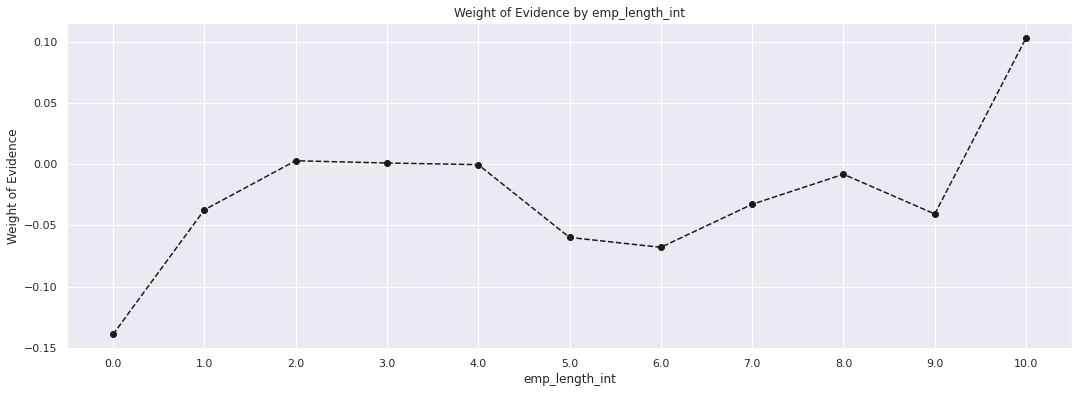

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Creates dummy variables for employment length

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [ ]:
# mths_since_issue_d
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

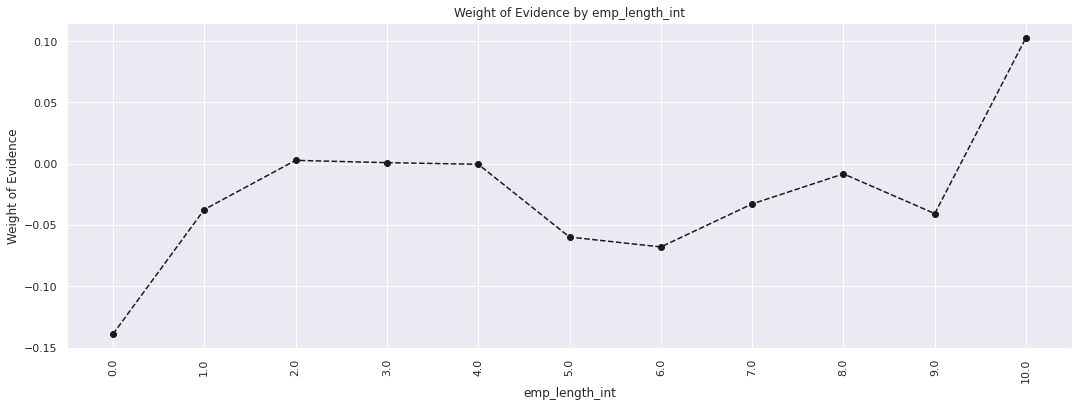

In [ ]:
plot_by_woe(df_temp, 90)

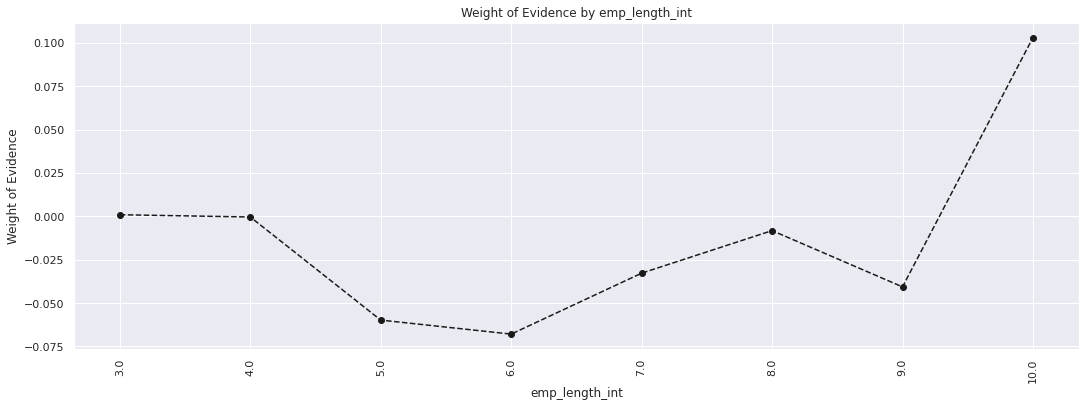

In [ ]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [ ]:
# Creates the following dummy variables for number of months since last issue date
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [ ]:
# int_rate - fine-classing
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)

df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002104    755.0    30.0   
1     (5.833, 6.246]   8459   0.980376    0.022677   8293.0   166.0   
2     (6.246, 6.658]   7826   0.971505    0.020980   7603.0   223.0   
3     (6.658, 7.071]   1816   0.973018    0.004868   1767.0    49.0   
4     (7.071, 7.484]   3143   0.976456    0.008426   3069.0    74.0   
5     (7.484, 7.897]  12581   0.962324    0.033727  12107.0   474.0   
6      (7.897, 8.31]   9687   0.949314    0.025969   9196.0   491.0   
7      (8.31, 8.722]   6594   0.965271    0.017677   6365.0   229.0   
8     (8.722, 9.135]   9539   0.937415    0.025572   8942.0   597.0   
9     (9.135, 9.548]   6681   0.963928    0.017910   6440.0   241.0   
10    (9.548, 9.961]   7588   0.931866    0.020342   7071.0   517.0   
11   (9.961, 10.374]  10941   0.933644    0.029330  10215.0   726.0   
12  (10.374, 10.786]   5857   0.913608    0.015701   5351.0   506.0   
13  (10.786, 11.199]  17851   0.929584    0.047854  16594.0  1257.0   
14  (11.199, 11.612]   4876   0.918786    0.013071   4480.0   396.0   
15  (11.612, 12.025]  15597   0.933128    0.041812  14554.0  1043.0   
16  (12.025, 12.438]  12336   0.892510    0.033070  11010.0  1326.0   
17   (12.438, 12.85]  11065   0.922910    0.029663  10212.0   853.0   
18   (12.85, 13.263]  21329   0.902949    0.057178  19259.0  2070.0   
19  (13.263, 13.676]  15392   0.907744    0.041262  13972.0  1420.0   
20  (13.676, 14.089]  10991   0.896825    0.029464   9857.0  1134.0   
21  (14.089, 14.502]  23436   0.887694    0.062826  20804.0  2632.0   
22  (14.502, 14.914]   4333   0.862913    0.011616   3739.0   594.0   
23  (14.914, 15.327]  18932   0.881840    0.050752  16695.0  2237.0   
24   (15.327, 15.74]  12327   0.887483    0.033046  10940.0  1387.0   
25   (15.74, 16.153]   7477   0.838973    0.020044   6273.0  1204.0   
26  (16.153, 16.566]  12991   0.859518    0.034826  11166.0  1825.0   
27  (16.566, 16.978]   4237   0.842577    0.011358   3570.0   667.0   
28  (16.978, 17.391]  11396   0.853545    0.030550   9727.0  1669.0   
29  (17.391, 17.804]  12288   0.839437    0.032941  10315.0  1973.0   
30  (17.804, 18.217]   1306   0.823124    0.003501   1075.0   231.0   
31   (18.217, 18.63]  11036   0.835448    0.029585   9220.0  1816.0   
32   (18.63, 19.042]   6808   0.819036    0.018251   5576.0  1232.0   
33  (19.042, 19.455]   4425   0.803164    0.011862   3554.0   871.0   
34  (19.455, 19.868]   6763   0.823599    0.018130   5570.0  1193.0   
35  (19.868, 20.281]   4899   0.832211    0.013133   4077.0   822.0   
36  (20.281, 20.694]   3221   0.795095    0.008635   2561.0   660.0   
37  (20.694, 21.106]   4016   0.799552    0.010766   3211.0   805.0   
38  (21.106, 21.519]   2729   0.779773    0.007316   2128.0   601.0   
39  (21.519, 21.932]    989   0.760364    0.002651    752.0   237.0   
40  (21.932, 22.345]   3476   0.795167    0.009318   2764.0   712.0   
41  (22.345, 22.758]   2251   0.763661    0.006034   1719.0   532.0   
42   (22.758, 23.17]   1535   0.759609    0.004115   1166.0   369.0   
43   (23.17, 23.583]   2652   0.782805    0.007109   2076.0   576.0   
44  (23.583, 23.996]   1573   0.724094    0.004217   1139.0   434.0   
45  (23.996, 24.409]   1455   0.767698    0.003901   1117.0   338.0   
46  (24.409, 24.822]   1664   0.762620    0.004461   1269.0   395.0   
47  (24.822, 25.234]   1315   0.771103    0.003525   1014.0   301.0   
48  (25.234, 25.647]    778   0.736504    0.002086    573.0   205.0   
49   (25.647, 26.06]   1786   0.754759    0.004788   1348.0   438.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002272    0.000736  1.127775             NaN       NaN  0.343349  
1      0.024960    0.004071  1.813434        0.018592  0.685659  0.343349  
2      0.022883    0.005469  1.431381        0.008871  0.382053  0.343349  
3      0.005318    0.001202  1.487473        0.001512  0.056092  0.343349  
4  

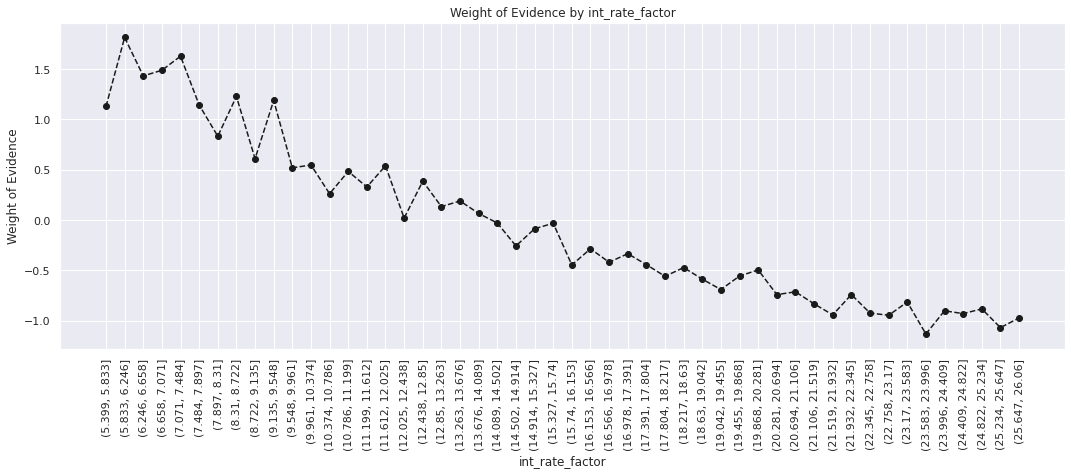

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Creates dummy variables for interest rates
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [ ]:
# funded_amnt - fine-classing
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878    0.003421   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250    0.008578   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198    0.016224  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781    0.019484  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566    0.013350  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942    0.024642  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155    0.042431  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593    0.044887  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839    0.018422  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403    0.030882  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218    0.045745  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538    0.017339  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793    0.024877  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955    0.091704  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716    0.017607  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918    0.022422  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190    0.061840  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407    0.013168  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925    0.019945  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377    0.022379  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853    0.013457  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143    0.058344  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534    0.031311  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000    0.017425  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163    0.009876   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783    0.031075  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443    0.010605   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736    0.054205  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034    0.005104   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268    0.011023   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033    0.026711  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200    0.026808  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003383    0.003729 -0.097472             NaN       NaN  0.018663  
1      0.008632    0.008145  0.057995        0.015372  0.155467  0.018663  
2      0.016396    0.014818  0.101189        0.003948  0.043194  0.018663  
3      0.019550    0.018940  0.031717        0.006417  0.069472  0.018663  
4 

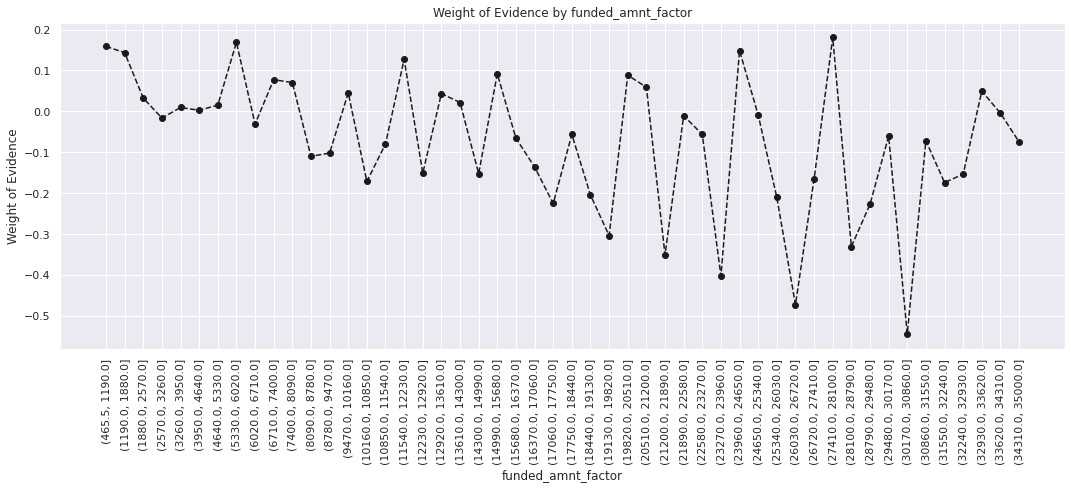

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# mths_since_earliest_cr_line - fine-classing 
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)

df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]      5   1.000000    0.000054     5.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
5                       (58.7, 70.44]      0        NaN    0.000000     NaN   
6                      (70.44, 82.18]    182   0.923077    0.001952   168.0   
7                      (82.18, 93.92]    508   0.913386    0.005447   464.0   
8                     (93.92, 105.66]    715   0.851748    0.007667   609.0   
9                     (105.66, 117.4]   1268   0.854890    0.013597  1084.0   
10                    (117.4, 129.14]   2314   0.875108    0.024813  2025.0   
11                   (129.14, 140.88]   2816   0.860795    0.030196  2424.0   
12                   (140.88, 152.62]   3366   0.882353    0.036094  2970.0   
13                   (152.62, 164.36]   3989   0.885686    0.042774  3533.0   
14                    (164.36, 176.1]   4857   0.886967    0.052082  4308.0   
15                    (176.1, 187.84]   5076   0.891450    0.054430  4525.0   
16                   (187.84, 199.58]   6578   0.882183    0.070536  5803.0   
17                   (199.58, 211.32]   7131   0.887393    0.076466  6328.0   
18                   (211.32, 223.06]   6775   0.884133    0.072649  5990.0   
19                    (223.06, 234.8]   5521   0.889875    0.059202  4913.0   
20                    (234.8, 246.54]   4966   0.884213    0.053251  4391.0   
21                   (246.54, 258.28]   4549   0.891185    0.048779  4054.0   
22                   (258.28, 270.02]   4472   0.891547    0.047954  3987.0   
23                   (270.02, 281.76]   3672   0.896786    0.039375  3293.0   
24                    (281.76, 293.5]   3640   0.900275    0.039032  3277.0   
25                    (293.5, 305.24]   2602   0.902767    0.027901  2349.0   
26                   (305.24, 316.98]   1988   0.908451    0.021317  1806.0   
27                   (316.98, 328.72]   2020   0.900990    0.021661  1820.0   
28                   (328.72, 340.46]   2129   0.901362    0.022829  1919.0   
29                    (340.46, 352.2]   1810   0.899448    0.019409  1628.0   
30                    (352.2, 363.94]   1477   0.914015    0.015838  1350.0   
31                   (363.94, 375.68]   1360   0.910294    0.014583  1238.0   
32                   (375.68, 387.42]   1152   0.905382    0.012353  1043.0   
33                   (387.42, 399.16]   1051   0.906755    0.011270   953.0   
34                    (399.16, 410.9]    826   0.917676    0.008857   758.0   
35                    (410.9, 422.64]    808   0.925743    0.008664   748.0   
36                   (422.64, 434.38]    524   0.895038    0.005619   469.0   
37                   (434.38, 446.12]    416   0.918269    0.004461   382.0   
38                   (446.12, 457.86]    329   0.917933    0.003528   302.0   
39                    (457.86, 469.6]    376   0.920213    0.004032   346.0   
40                    (469.6, 481.34]    371   0.916442    0.003978   340.0   
41                   (481.34, 493.08]    294   0.908163    0.003153   267.0   
42                   (493.08, 504.82]    229   0.943231    0.002456   216.0   
43                   (504.82, 516.56]    178   0.915730    0.001909   163.0   
44                    (516.56, 528.3]    159   0.924528    0.001705   147.0   
45                    (528.3, 540.04]    140   0.907143    0.001501   127.0   
46                   (540.04, 551.78]    135   0.903704    0.001448   122.0   
47                   (551.78, 563.52]     93   0.913978    0.000997    85.0   
48                   (563.52, 575.26]     80   0.862500    0.000858    69.0   
49                    (575.26, 587.0]    310   0.8677

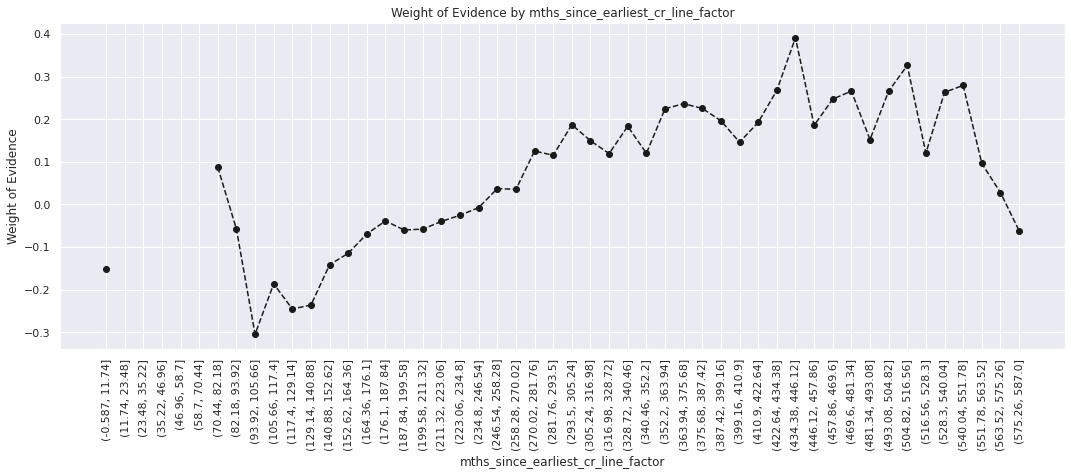

In [ ]:
plot_by_woe(df_temp, 90)

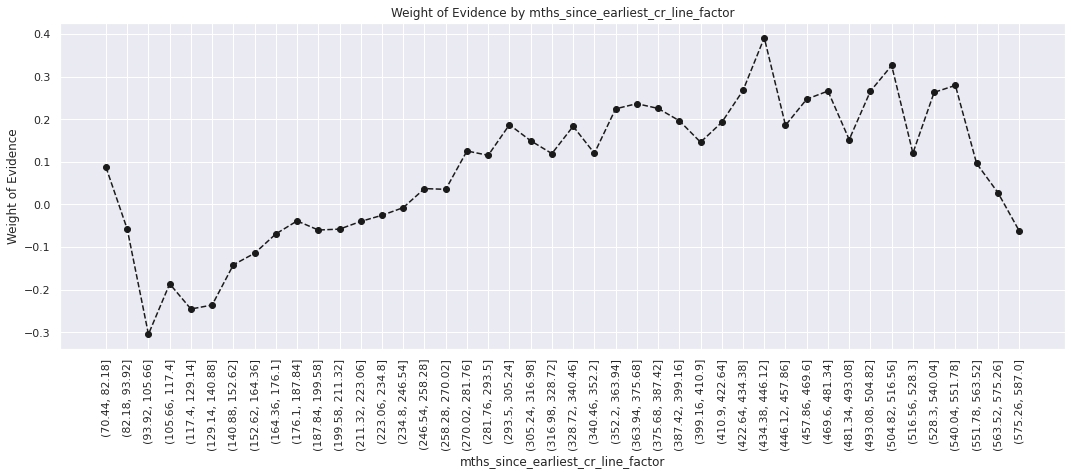

In [ ]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [ ]:
# Creates the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [ ]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)

df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306417   0.890499    0.821432  272864.0  33553.0   
1           1.0   44927   0.893249    0.120439   40131.0   4796.0   
2           2.0   13118   0.889007    0.035166   11662.0   1456.0   
3           3.0    4550   0.883297    0.012197    4019.0    531.0   
4           4.0    1868   0.898822    0.005008    1679.0    189.0   
5           5.0     966   0.881988    0.002590     852.0    114.0   
6           6.0     501   0.902196    0.001343     452.0     49.0   
7           7.0     279   0.860215    0.000748     240.0     39.0   
8           8.0     148   0.905405    0.000397     134.0     14.0   
9           9.0      89   0.887640    0.000239      79.0     10.0   
10         10.0      56   0.857143    0.000150      48.0      8.0   
11         11.0      31   0.903226    0.000083      28.0      3.0   
12         12.0      30   0.733333    0.000080      22.0      8.0   
13         13.0      18   0.833333    0.000048      15.0      3.0   
14         14.0       6   0.833333    0.000016       5.0      1.0   
15         15.0       6   0.833333    0.000016       5.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000008       2.0      1.0   
18         18.0       3   0.666667    0.000008       2.0      1.0   
19         19.0       2   1.000000    0.000005       2.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.821261    0.822821 -0.001898             NaN       NaN  inf  
1      0.120786    0.117612  0.026622        0.002750  0.028520  inf  
2      0.035100    0.035706 -0.017102        0.004242  0.043724  inf  
3      0.012096    0.013022 -0.073719        0.005711  0.056616  inf  
4      0.005053    0.004635  0.086462        0.015526  0.160180  inf  
5      0.002564    0.002796 -0.086357        0.016835  0.172819  inf  
6      0.001360    0.001202  0.124117        0.020208  0.210474  inf  
7      0.000722    0.000956 -0.280668        0.041981  0.404785  inf  
8      0.000403    0.000343  0.161037        0.045190  0.441705  inf  
9      0.000238    0.000245 -0.030882        0.017765  0.191920  inf  
10     0.000144    0.000196 -0.305986        0.030498  0.275103  inf  
11     0.000084    0.000074  0.135847        0.046083  0.441833  inf  
12     0.000066    0.000196 -1.086144        0.169892  1.221991  inf  
13     0.000045    0.000074 -0.488307        0.100000  0.597837  inf  
14     0.000015    0.000025 -0.488307        0.000000  0.000000  inf  
15     0.000015    0.000025 -0.488307        0.000000  0.000000  inf  
16     0.000012    0.000000       inf        0.166667       inf  inf  
17     0.000006    0.000025 -1.404598        0.333333       inf  inf  
18     0.000006    0.000025 -1.404598        0.000000  0.000000  inf  
19     0.000006    0.000000       inf        0.333333       inf  inf  
20     0.000003    0.000025 -2.097745        0.500000       inf  inf  
21     0.000006    0.000000       inf        0.500000       inf  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf

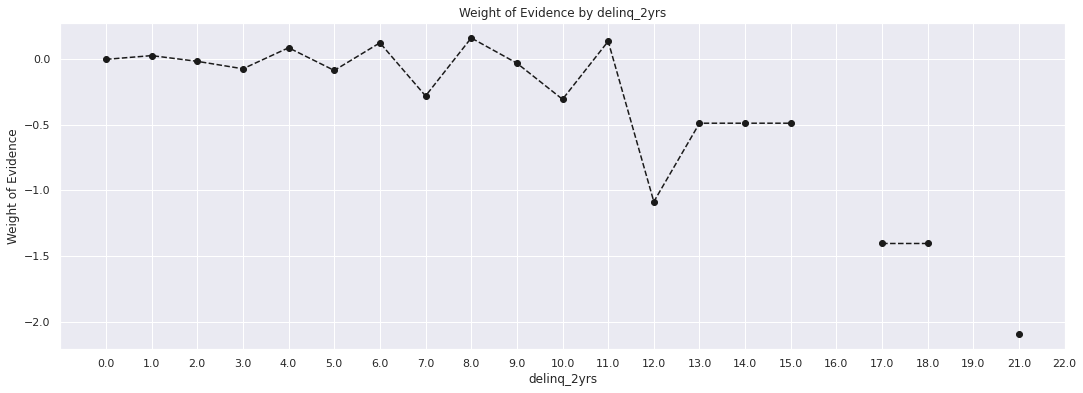

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [ ]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.908395    0.518009  175531.0  17701.0   
1              1.0  104163   0.884950    0.279236   92179.0  11984.0   
2              2.0   46214   0.864197    0.123889   39938.0   6276.0   
3              3.0   20040   0.839671    0.053723   16827.0   3213.0   
4              4.0    5810   0.848365    0.015575    4929.0    881.0   
5              5.0    2217   0.824989    0.005943    1829.0    388.0   
6              6.0     977   0.788127    0.002619     770.0    207.0   
7              7.0     159   0.679245    0.000426     108.0     51.0   
8              8.0     101   0.643564    0.000271      65.0     36.0   
9              9.0      43   0.674419    0.000115      29.0     14.0   
10            10.0      17   0.882353    0.000046      15.0      2.0   
11            11.0       8   0.625000    0.000021       5.0      3.0   
12            12.0      12   0.500000    0.000032       6.0      6.0   
13            13.0       5   0.800000    0.000013       4.0      1.0   
14            14.0       5   0.200000    0.000013       1.0      4.0   
15            15.0       9   0.444444    0.000024       4.0      5.0   
16            16.0       3   1.000000    0.000008       3.0      0.0   
17            17.0       2   0.500000    0.000005       1.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528310    0.434082  0.196450             NaN       NaN  inf  
1      0.277439    0.293884 -0.057585        0.023446  0.254035  inf  
2      0.120205    0.153907 -0.247150        0.020753  0.189564  inf  
3      0.050646    0.078792 -0.441965        0.024526  0.194816  inf  
4      0.014835    0.021605 -0.375911        0.008694  0.066054  inf  
5      0.005505    0.009515 -0.547226        0.023376  0.171314  inf  
6      0.002318    0.005076 -0.784073        0.036862  0.236848  inf  
7      0.000325    0.001251 -1.347439        0.108882  0.563366  inf  
8      0.000196    0.000883 -1.506877        0.035681  0.159437  inf  
9      0.000087    0.000343 -1.369506        0.030854  0.137370  inf  
10     0.000045    0.000049 -0.082842        0.207934  1.286665  inf  
11     0.000015    0.000074 -1.586919        0.257353  1.504077  inf  
12     0.000018    0.000147 -2.097745        0.125000  0.510826  inf  
13     0.000012    0.000025 -0.711451        0.300000  1.386294  inf  
14     0.000003    0.000098 -3.484039        0.600000  2.772589  inf  
15     0.000012    0.000123 -2.320889        0.244444  1.163151  inf  
16     0.000009    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000025 -2.097745        0.500000       inf  inf  
18     0.000003    0.000025 -2.097745        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000025      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000025      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

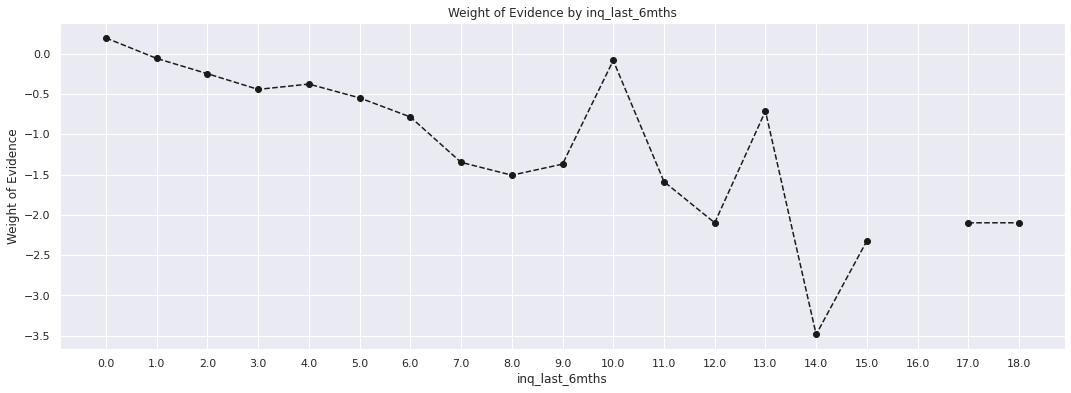

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [ ]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)

df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0        0.0     29   0.758621    0.000078    22.0     7.0     0.000066   
1        1.0    110   0.872727    0.000295    96.0    14.0     0.000289   
2        2.0   1456   0.845467    0.003903  1231.0   225.0     0.003705   
3        3.0   4378   0.873687    0.011736  3825.0   553.0     0.011512   
4        4.0  10028   0.891504    0.026883  8940.0  1088.0     0.026907   
..       ...    ...        ...         ...     ...     ...          ...   
56      58.0      1   1.000000    0.000003     1.0     0.0     0.000003   
57      62.0      1   1.000000    0.000003     1.0     0.0     0.000003   
58      75.0      1   1.000000    0.000003     1.0     0.0     0.000003   
59      76.0      2   0.000000    0.000005     0.0     2.0     0.000000   
60      84.0      1   1.000000    0.000003     1.0     0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000172 -0.952613             NaN       NaN  inf  
1     0.000343 -0.172454        0.114107  0.780159  inf  
2     0.005518 -0.398263        0.027260  0.225809  inf  
3     0.013561 -0.163789        0.028220  0.234474  inf  
4     0.026681  0.008449        0.017817  0.172239  inf  
..         ...       ...             ...       ...  ...  
56    0.000000       inf        0.000000       NaN  inf  
57    0.000000       inf        0.000000       NaN  inf  
58    0.000000       inf        0.000000       NaN  inf  
59    0.000049      -inf        1.000000       inf  inf  
60    0.000000       inf        1.000000       inf  inf  

[61 rows x 12 columns]

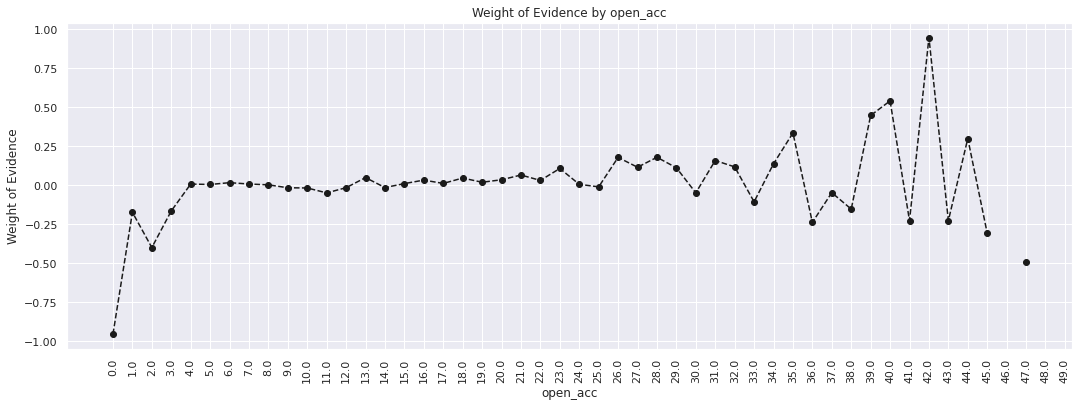

In [ ]:
plot_by_woe(df_temp, 90)

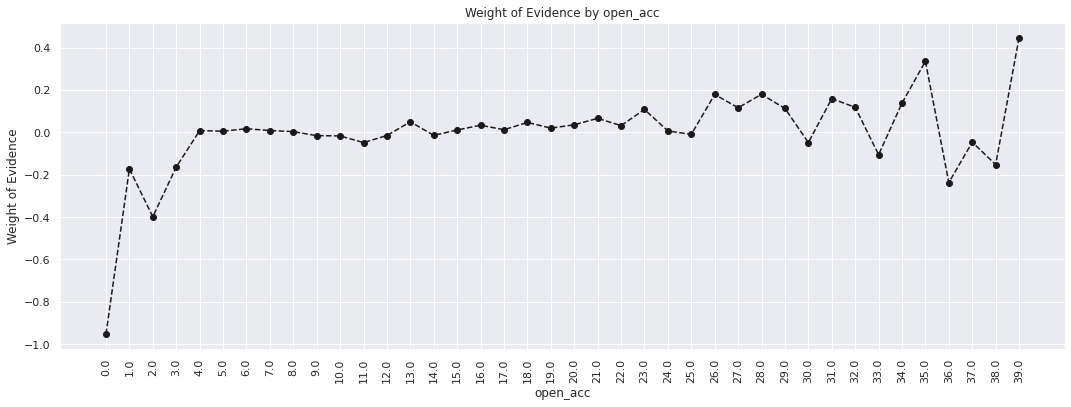

In [ ]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [ ]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [ ]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)

df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.889941    0.868565  288340.0  35659.0     0.867840   
1       1.0   42381   0.893419    0.113613   37864.0   4517.0     0.113962   
2       2.0    4527   0.903247    0.012136    4089.0    438.0     0.012307   
3       3.0    1280   0.920312    0.003431    1178.0    102.0     0.003546   
4       4.0     408   0.924020    0.001094     377.0     31.0     0.001135   
5       5.0     203   0.911330    0.000544     185.0     18.0     0.000557   
6       6.0     117   0.931624    0.000314     109.0      8.0     0.000328   
7       7.0      48   0.958333    0.000129      46.0      2.0     0.000138   
8       8.0      24   1.000000    0.000064      24.0      0.0     0.000072   
9       9.0      14   0.785714    0.000038      11.0      3.0     0.000033   
10     10.0      10   1.000000    0.000027      10.0      0.0     0.000030   
11     11.0       3   1.000000    0.000008       3.0      0.0     0.000009   
12     12.0       1   1.000000    0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
18     19.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.874467 -0.007606             NaN       NaN  inf  
1     0.110771  0.028408        0.003478  0.036014  inf  
2     0.010741  0.136092        0.009828  0.107684  inf  
3     0.002501  0.348856        0.017065  0.212764  inf  
4     0.000760  0.400513        0.003707  0.051657  inf  
5     0.000441  0.232239        0.012690  0.168274  inf  
6     0.000196  0.514161        0.020294  0.281922  inf  
7     0.000049  1.037749        0.026709  0.523588  inf  
8     0.000000       inf        0.041667       inf  inf  
9     0.000074 -0.798462        0.214286       inf  inf  
10    0.000000       inf        0.214286       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

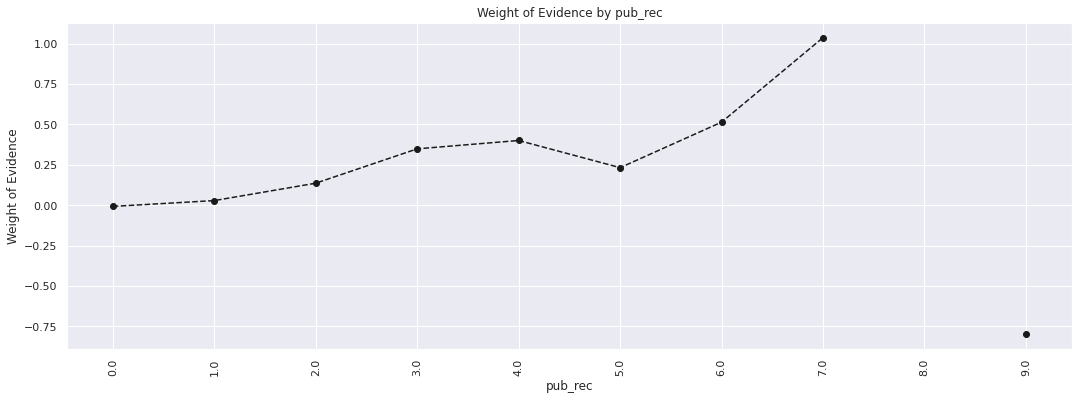

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [ ]:
# total_acc - fine-classing
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.776000    0.001340     97.0    28.0   
1       (3.12, 6.24]   1499   0.850567    0.016074   1275.0   224.0   
2       (6.24, 9.36]   3715   0.871871    0.039836   3239.0   476.0   
3      (9.36, 12.48]   6288   0.874841    0.067427   5501.0   787.0   
4      (12.48, 15.6]   8289   0.888286    0.088883   7363.0   926.0   
5      (15.6, 18.72]   9843   0.890176    0.105547   8762.0  1081.0   
6     (18.72, 21.84]  10270   0.893866    0.110126   9180.0  1090.0   
7     (21.84, 24.96]   9971   0.892789    0.106920   8902.0  1069.0   
8     (24.96, 28.08]  11873   0.892108    0.127315  10592.0  1281.0   
9      (28.08, 31.2]   7289   0.892715    0.078160   6507.0   782.0   
10     (31.2, 34.32]   6151   0.902617    0.065958   5552.0   599.0   
11    (34.32, 37.44]   4745   0.905796    0.050881   4298.0   447.0   
12    (37.44, 40.56]   3615   0.897372    0.038764   3244.0   371.0   
13    (40.56, 43.68]   2883   0.890045    0.030915   2566.0   317.0   
14     (43.68, 46.8]   1938   0.891641    0.020781   1728.0   210.0   
15     (46.8, 49.92]   1478   0.905954    0.015849   1339.0   139.0   
16    (49.92, 53.04]   1309   0.902215    0.014036   1181.0   128.0   
17    (53.04, 56.16]    640   0.893750    0.006863    572.0    68.0   
18    (56.16, 59.28]    428   0.873832    0.004589    374.0    54.0   
19     (59.28, 62.4]    386   0.878238    0.004139    339.0    47.0   
20     (62.4, 65.52]    322   0.844720    0.003453    272.0    50.0   
21    (65.52, 68.64]     57   0.947368    0.000611     54.0     3.0   
22    (68.64, 71.76]     43   0.906977    0.000461     39.0     4.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001168    0.002748 -0.855734             NaN       NaN  inf  
1      0.015349    0.021982 -0.359185        0.074567  0.496549  inf  
2      0.038993    0.046712 -0.180639        0.021304  0.178547  inf  
3      0.066224    0.077233 -0.153784        0.002970  0.026855  inf  
4      0.088639    0.090873

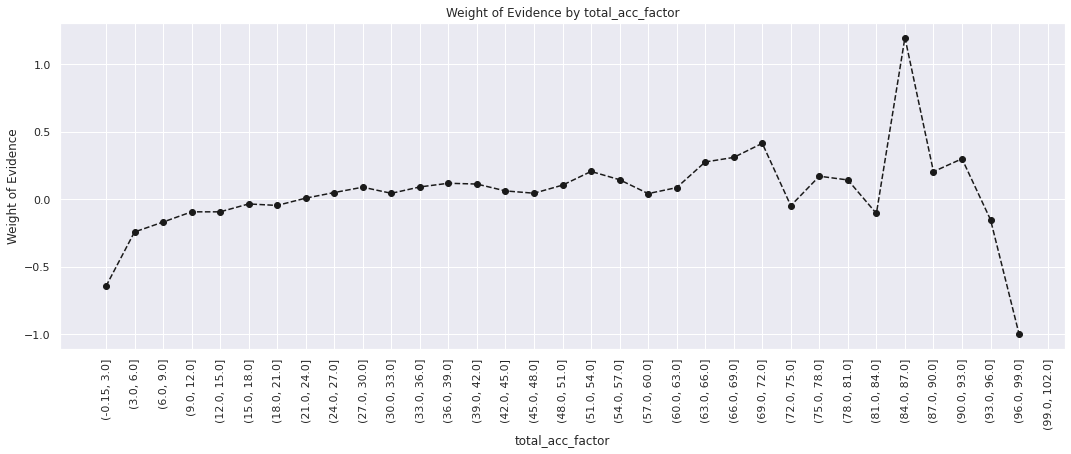

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [ ]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)

df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371682   0.890648    0.996392  331038.0  40644.0   
1             1.0    1263   0.899446    0.003386    1136.0    127.0   
2             2.0      70   0.928571    0.000188      65.0      5.0   
3             3.0       7   0.857143    0.000019       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996352    0.996714 -0.000363             NaN       NaN  inf  
1     0.003419    0.003114  0.093337        0.008797  0.093700  inf  
2     0.000196    0.000123  0.467204        0.029126  0.373868  inf  
3     0.000018    0.000025 -0.305986        0.071429  0.773190  inf  
4     0.000012    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000025 -2.097745        0.500000       inf  inf

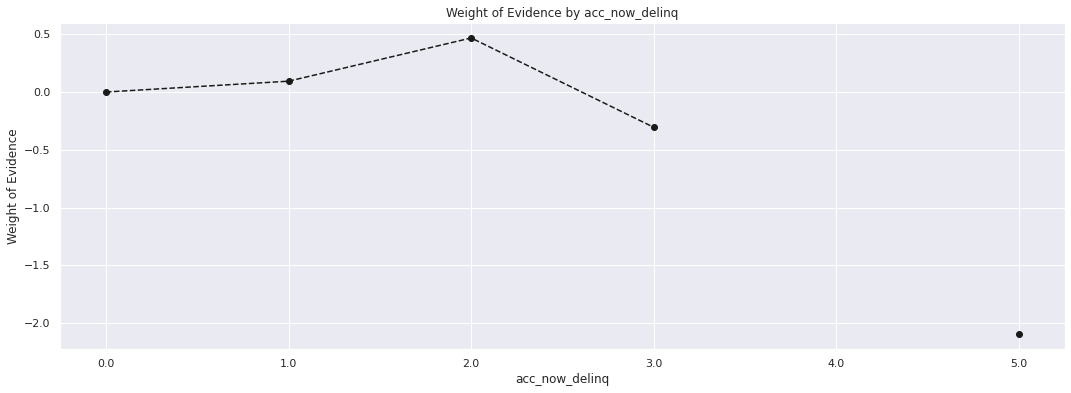

In [ ]:
plot_by_woe(df_temp)

In [ ]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [ ]:
# total_rev_hi_lim - fine-classing
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.840336    0.002552   200.0   38.0   
1           (1006.566, 2013.133]    678   0.827434    0.007270   561.0  117.0   
2             (2013.133, 3019.7]   1121   0.852810    0.012021   956.0  165.0   
3             (3019.7, 4026.266]   1461   0.878166    0.015666  1283.0  178.0   
4           (4026.266, 5032.832]   2163   0.867776    0.023194  1877.0  286.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0        0.002408    0.003729 -0.437509             NaN       NaN  inf  
1        0.006754    0.011482 -0.530694        0.012903  0.093184  inf  
2        0.011509    0.016192 -0.341428        0.025376  0.189265  inf  
3        0.015445    0.017468 -0.123068        0.025356  0.218360  inf  
4        0.022596    0.028067 -0.216802        0.010389  0.093735  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

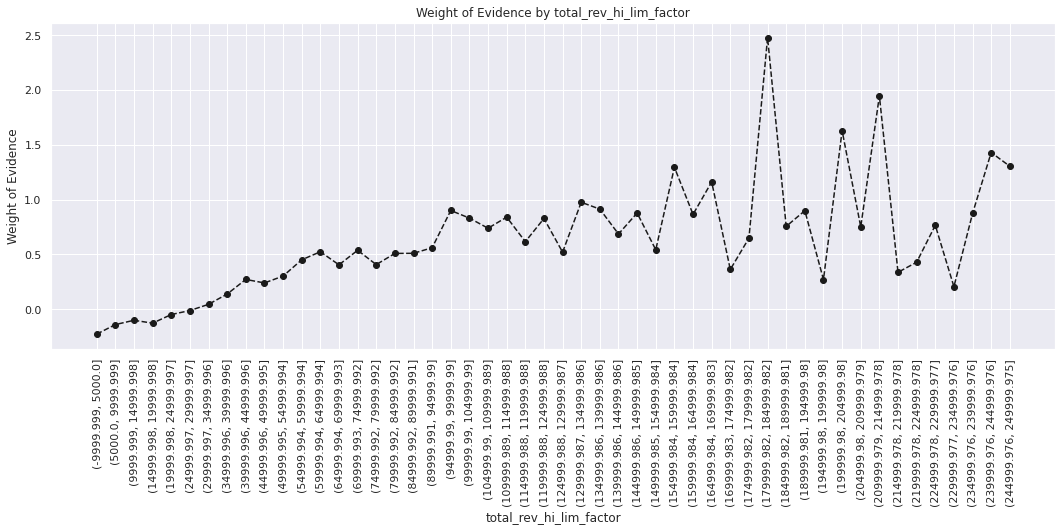

In [ ]:
plot_by_woe(df_temp.iloc[:50, : ], 90)

In [ ]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [ ]:
# installment - fine-classing
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.872165    0.005201   423.0   62.0   
1       (43.585, 71.41]   1246   0.904494    0.013361  1127.0  119.0   
2       (71.41, 99.235]   1731   0.895436    0.018562  1550.0  181.0   
3      (99.235, 127.06]   2292   0.896597    0.024577  2055.0  237.0   
4     (127.06, 154.885]   2602   0.886241    0.027901  2306.0  296.0   
5     (154.885, 182.71]   4133   0.897653    0.044318  3710.0  423.0   
6     (182.71, 210.535]   4109   0.905086    0.044061  3719.0  390.0   
7     (210.535, 238.36]   3730   0.901877    0.039997  3364.0  366.0   
8     (238.36, 266.185]   4660   0.899785    0.049969  4193.0  467.0   
9     (266.185, 294.01]   4975   0.888844    0.053347  4422.0  553.0   
10    (294.01, 321.835]   5186   0.906286    0.055610  4700.0  486.0   
11    (321.835, 349.66]   6432   0.892568    0.068971  5741.0  691.0   
12    (349.66, 377.485]   4758   0.881673    0.051020  4195.0  563.0   
13    (377.485, 405.31]   4352   0.900276    0.046667  3918.0  434.0   
14    (405.31, 433.135]   3429   0.882765    0.036769  3027.0  402.0   
15    (433.135, 460.96]   3225   0.879380    0.034582  2836.0  389.0   
16    (460.96, 488.785]   3865   0.894437    0.041445  3457.0  408.0   
17    (488.785, 516.61]   3861   0.884227    0.041402  3414.0  447.0   
18    (516.61, 544.435]   2730   0.868864    0.029274  2372.0  358.0   
19    (544.435, 572.26]   2564   0.877535    0.027494  2250.0  314.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.901918    0.024599  2069.0  225.0   
22    (627.91, 655.735]   2091   0.901004    0.022422  1884.0  207.0   
23    (655.735, 683.56]   2295   0.894989    0.024609  2054.0  241.0   
24    (683.56, 711.385]   1650   0.876970    0.017693  1447.0  203.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.897794    0.014583  1221.0  139.0   
27    (767.035, 794.86]   1160   0.886207    0.012439  1028.0  132.0   
28    (794.86, 822.685]   1023   0.888563    0.010970   909.0  114.0   
29    (822.685, 850.51]    967   0.885212    0.010369   856.0  111.0   
30    (850.51, 878.335]   1046   0.894837    0.011216   936.0  110.0   
31    (878.335, 906.16]    707   0.861386    0.007581   609.0   98.0   
32    (906.16, 933.985]    604   0.855960    0.006477   517.0   87.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005092    0.006084 -0.178003             NaN       NaN  inf  
1      0.013567    0.011678  0.149950        0.032329  0.327953  inf  
2      0.018660    0.017763  0.049273        0.009058  0.100678  inf  
3      0.024739    0.023258  0.061730        0.0

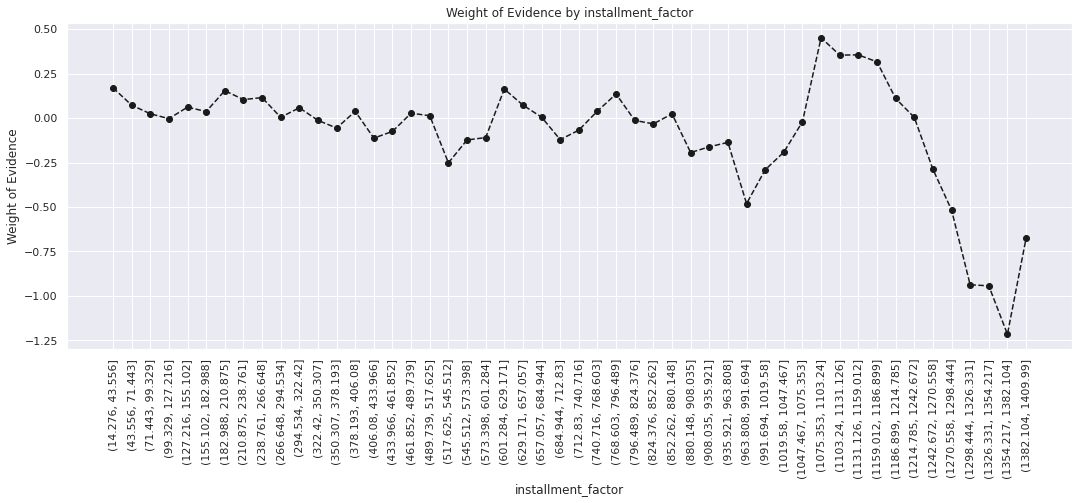

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# annual_inc - fine-classing
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.877932    0.671488  54977.0  7644.0   
1      (79752.0, 154704.0]  26582   0.915206    0.285040  24328.0  2254.0   
2     (154704.0, 229656.0]   2916   0.926269    0.031268   2701.0   215.0   
3     (229656.0, 304608.0]    710   0.928169    0.007613    659.0    51.0   
4     (304608.0, 379560.0]    171   0.929825    0.001834    159.0    12.0   
..                     ...    ...        ...         ...      ...     ...   
95  (7125240.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
96  (7200192.0, 7275144.0]      0        NaN    0.000000      NaN     NaN   
97  (7275144.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
98  (7350096.0, 7425048.0]      0        NaN    0.000000      NaN     NaN   
99  (7425048.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.661839    0.750147 -0.125247             NaN       NaN  inf  
1      0.292872    0.221197  0.280681        0.037273  0.405928  inf  
2      0.032516    0.021099  0.432499        0.011063  0.151818  inf  
3      0.007933    0.005005  0.460657        0.001900  0.028159  inf  
4      0.001914    0.001178  0.485757        0.001656  0.025100  inf  
..          ...         ...       ...             ...       ...  ...  
95          NaN         NaN       NaN             NaN       NaN  inf  
96          NaN         NaN       NaN             NaN       NaN  inf  
97          NaN         NaN       NaN             NaN       NaN  inf  
98          NaN         NaN       NaN             NaN       NaN  inf  
99     0.000024    0.000000       inf             NaN       NaN  inf  

[100 rows x 12 columns]

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [ ]:
# Determine the categories of everyone with annual income of 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000043     12.0     3.0   
1       (4658.08, 7420.16]     40   0.750000    0.000114     30.0    10.0   
2      (7420.16, 10182.24]    287   0.874564    0.000818    251.0    36.0   
3     (10182.24, 12944.32]    547   0.828154    0.001558    453.0    94.0   
4      (12944.32, 15706.4]   1210   0.830579    0.003447   1005.0   205.0   
5      (15706.4, 18468.48]   1522   0.847569    0.004335   1290.0   232.0   
6     (18468.48, 21230.56]   2928   0.855533    0.008340   2505.0   423.0   
7     (21230.56, 23992.64]   2495   0.844489    0.007107   2107.0   388.0   
8     (23992.64, 26754.72]   7016   0.848632    0.019985   5954.0  1062.0   
9      (26754.72, 29516.8]   5643   0.857345    0.016074   4838.0   805.0   
10     (29516.8, 32278.88]  11915   0.859505    0.033940  10241.0  1674.0   
11    (32278.88, 35040.96]  12241   0.860959    0.034868  10539.0  1702.0   
12    (35040.96, 37803.04]   7905   0.858950    0.022517   6790.0  1115.0   
13    (37803.04, 40565.12]  17910   0.866443    0.051017  15518.0  2392.0   
14     (40565.12, 43327.2]  12508   0.869364    0.035629  10874.0  1634.0   
15     (43327.2, 46089.28]  16590   0.872875    0.047257  14481.0  2109.0   
16    (46089.28, 48851.36]   9878   0.877506    0.028137   8668.0  1210.0   
17    (48851.36, 51613.44]  19024   0.879573    0.054190  16733.0  2291.0   
18    (51613.44, 54375.52]  12766   0.886260    0.036364  11314.0  1452.0   
19     (54375.52, 57137.6]  16153   0.887018    0.046012  14328.0  1825.0   
20     (57137.6, 59899.68]   6482   0.884295    0.018464   5732.0   750.0   
21    (59899.68, 62661.76]  21299   0.881309    0.060670  18771.0  2528.0   
22    (62661.76, 65423.84]  16090   0.889683    0.045832  14315.0  1775.0   
23    (65423.84, 68185.92]   7942   0.897759    0.022623   7130.0   812.0   
24     (68185.92, 70948.0]  12982   0.893776    0.036979  11603.0  1379.0   
25     (70948.0, 73710.08]   8385   0.898629    0.023885   7535.0   850.0   
26    (73710.08, 76472.16]  13145   0.901712    0.037444  11853.0  1292.0   
27    (76472.16, 79234.24]   5679   0.901919    0.016177   5122.0   557.0   
28    (79234.24, 81996.32]  11397   0.901465    0.032464  10274.0  1123.0   
29     (81996.32, 84758.4]   6063   0.912749    0.017270   5534.0   529.0   
30     (84758.4, 87520.48]   9980   0.909218    0.028428   9074.0   906.0   
31    (87520.48, 90282.56]  10393   0.908977    0.029604   9447.0   946.0   
32    (90282.56, 93044.64]   4337   0.914457    0.012354   3966.0   371.0   
33    (93044.64, 95806.72]   5634   0.914980    0.016048   5155.0   479.0   
34     (95806.72, 98568.8]   4667   0.911292    0.013294   4253.0   414.0   
35    (98568.8, 101330.88]   8793   0.915046    0.025047   8046.0   747.0   
36  (101330.88, 104092.96]   3232   0.919864    0.009206   2973.0   259.0   
37  (104092.96, 106855.04]   3736   0.923715    0.010642   3451.0   285.0   
38  (106855.04, 109617.12]   2277   0.921827    0.006486   2099.0   178.0   
39   (109617.12, 112379.2]   5714   0.915646    0.016276   5232.0   482.0   
40   (112379.2, 115141.28]   3218   0.938160    0.009166   3019.0   199.0   
41  (115141.28, 117903.36]   1128   0.919326    0.003213   1037.0    91.0   
42  (117903.36, 120665.44]   6228   0.913455    0.017740   5689.0   539.0   
43  (120665.44, 123427.52]   1043   0.937680    0.002971    978.0    65.0   
44   (123427.52, 126189.6]   3566   0.921761    0.010158   3287.0   279.0   
45   (126189.6, 128951.68]    791   0.917826    0.002253    726.0    65.0   
46  (128951.68, 131713.76]   3033   0.930762    0.008639   2823.0   210.0   
47  (131713.76, 134475.84]    801   0.923845    0.002282    740.0    61.0   
48  (134475.84, 137237.92]   1902   0.942166    0.005418   1792.0   110.0   
49   (137237.92, 140000.0]   2532   0.924171    0.007212   2340.0   192.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

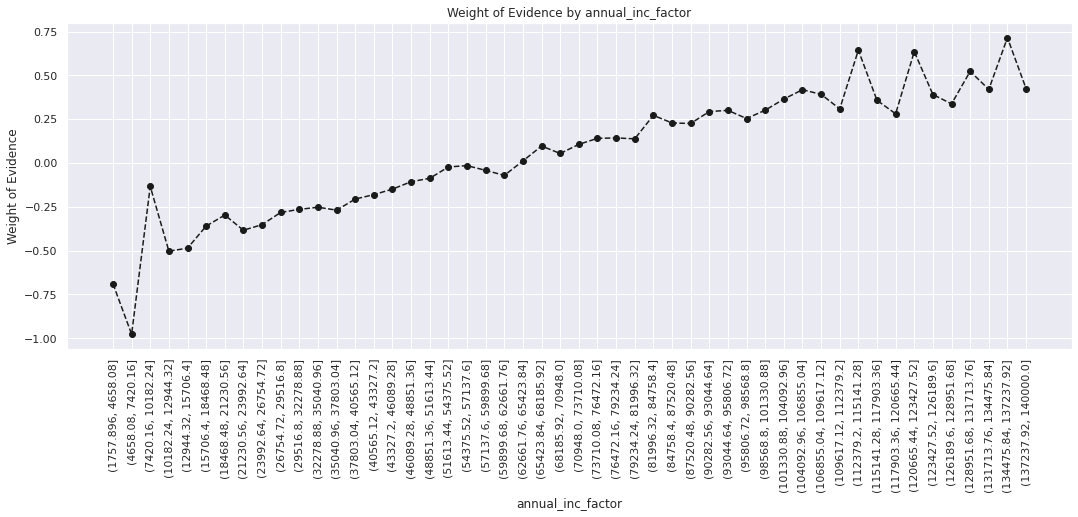

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# WoE is monotonically decreasing with income
# Splits income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [ ]:
# mths_since_last_delinq
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5277   0.871518    0.030531   4599.0   
1                   (3.76, 7.52]  11167   0.887615    0.064608   9912.0   
2                  (7.52, 11.28]  13306   0.892830    0.076983  11880.0   
3                 (11.28, 15.04]  13216   0.888847    0.076462  11747.0   
4                  (15.04, 18.8]   9337   0.894934    0.054020   8356.0   
5                  (18.8, 22.56]  11641   0.892707    0.067350  10392.0   
6                 (22.56, 26.32]  10887   0.896298    0.062988   9758.0   
7                 (26.32, 30.08]  10560   0.895076    0.061096   9452.0   
8                 (30.08, 33.84]   7576   0.902191    0.043832   6835.0   
9                  (33.84, 37.6]   9795   0.897397    0.056670   8790.0   
10                 (37.6, 41.36]   9352   0.891788    0.054107   8340.0   
11                (41.36, 45.12]   9202   0.896653    0.053239   8251.0   
12                (45.12, 48.88]   6538   0.897828    0.037826   5870.0   
13                (48.88, 52.64]   6486   0.888683    0.037525   5764.0   
14                 (52.64, 56.4]   6045   0.892639    0.034974   5396.0   
15                 (56.4, 60.16]   5867   0.902506    0.033944   5295.0   
16                (60.16, 63.92]   4040   0.887376    0.023374   3585.0   
17                (63.92, 67.68]   5314   0.892172    0.030745   4741.0   
18                (67.68, 71.44]   5141   0.889321    0.029744   4572.0   
19                 (71.44, 75.2]   4950   0.886263    0.028639   4387.0   
20                 (75.2, 78.96]   3312   0.891908    0.019162   2954.0   
21                (78.96, 82.72]   3577   0.885099    0.020695   3166.0   
22                (82.72, 86.48]     94   0.787234    0.000544     74.0   
23                (86.48, 90.24]     38   0.894737    0.000220     34.0   
24                 (90.24, 94.0]     32   0.937500    0.000185     30.0   
25                 (94.0, 97.76]     20   0.750000    0.000116     15.0   
26               (97.76, 101.52]     13   0.923077    0.000075     12.0   
27              (101.52, 105.28]     11   0.909091    0.000064     10.0   
28              (105.28, 109.04]      8   0.750000    0.000046      6.0   
29               (109.04, 112.8]      2   0.500000    0.000012      1.0   
30               (112.8, 116.56]      7   0.857143    0.000040      6.0   
31              (116.56, 120.32]      2   1.000000    0.000012      2.0   
32              (120.32, 124.08]      1   1.000000    0.000006      1.0   
33              (124.08, 127.84]      2   1.000000    0.000012      2.0   
34               (127.84, 131.6]      5   1.000000    0.000029      5.0   
35               (131.6, 135.36]      7   0.714286    0.000040      5.0   
36              (135.36, 139.12]      2   1.000000    0.000012      2.0   
37              (139.12, 142.88]      3   1.000000    0.000017      3.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      3   0.666667    0.000017      2.0   
40               (150.4, 154.16]      2   0.500000    0.000012      1.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      1   1.000000    0.000006      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    678.0     0.029814    0.036481 -0.201825             NaN       NaN  inf  
1   1255.0     0.06

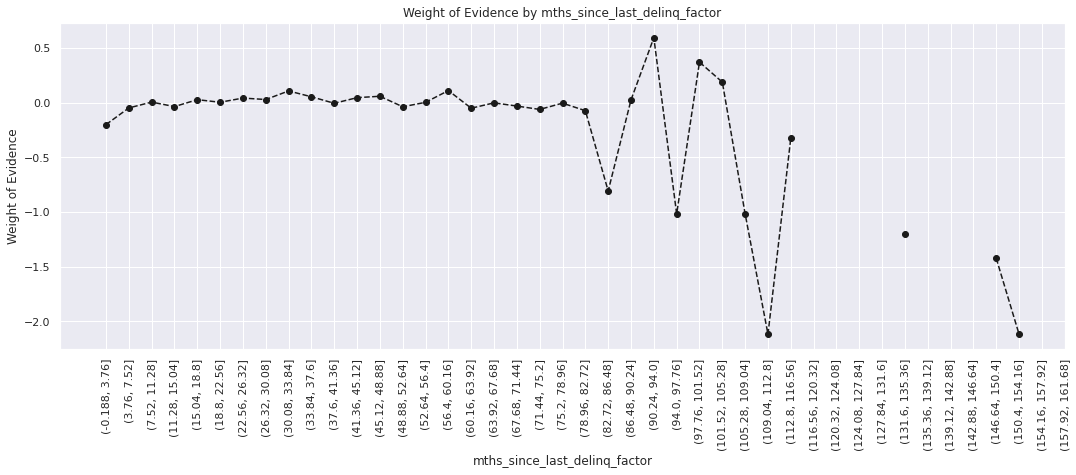

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [ ]:
# dti- fine-classing
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      (-0.04, 0.4]    187   0.893048    0.002005   167.0   20.0     0.002010   
1        (0.4, 0.8]    184   0.880435    0.001973   162.0   22.0     0.001950   
2        (0.8, 1.2]    223   0.892377    0.002391   199.0   24.0     0.002396   
3        (1.2, 1.6]    255   0.905882    0.002734   231.0   24.0     0.002781   
4        (1.6, 2.0]    315   0.892063    0.003378   281.0   34.0     0.003383   
..              ...    ...        ...         ...     ...    ...          ...   
95  (37.991, 38.39]     54   0.888889    0.000579    48.0    6.0     0.000578   
96   (38.39, 38.79]     37   0.837838    0.000397    31.0    6.0     0.000373   
97   (38.79, 39.19]     45   0.844444    0.000483    38.0    7.0     0.000457   
98   (39.19, 39.59]     44   0.931818    0.000472    41.0    3.0     0.000494   
99   (39.59, 39.99]     57   0.859649    0.000611    49.0    8.0     0.000590   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.001963  0.024021             NaN       NaN  0.038146  
1     0.002159 -0.101687        0.012613  0.125708  0.038146  
2     0.002355  0.017010        0.011942  0.118697  0.038146  
3     0.002355  0.166123        0.013506  0.149113  0.038146  
4     0.003337  0.013753        0.013819  0.152370  0.038146  
..         ...       ...             ...       ...       ...  
95    0.000589 -0.018799        0.044444  0.387766  0.038146  
96    0.000589 -0.456013        0.051051  0.437214  0.038146  
97    0.000687 -0.406565        0.006607  0.049448  0.038146  
98    0.000294  0.516719        0.087374  0.923284  0.038146  
99    0.000785 -0.285862        0.072169  0.802581  0.038146  

[100 rows x 12 columns]

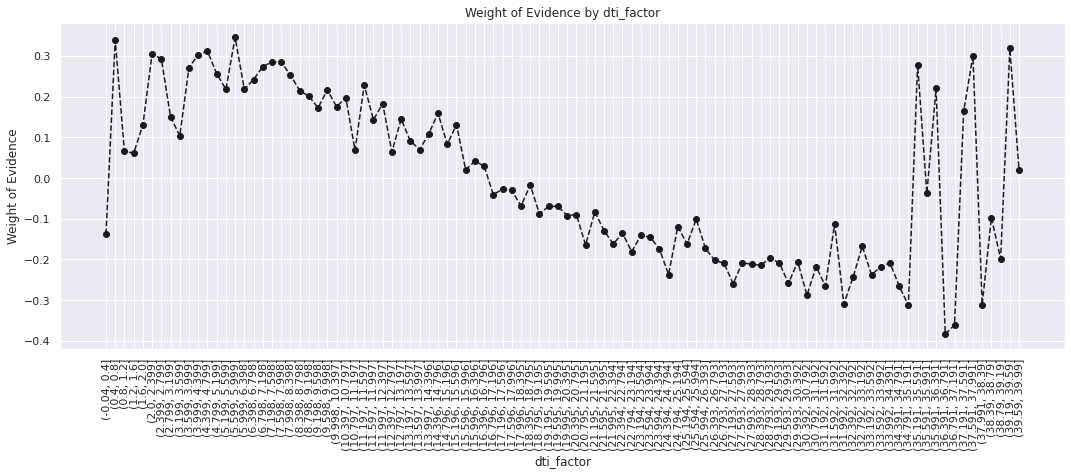

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [ ]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1366   0.894583    0.003690   1222.0   144.0     0.003707   
1      (0.7, 1.4]   1664   0.893029    0.004496   1486.0   178.0     0.004507   
2      (1.4, 2.1]   1986   0.912890    0.005365   1813.0   173.0     0.005499   
3      (2.1, 2.8]   2594   0.913261    0.007008   2369.0   225.0     0.007186   
4      (2.8, 3.5]   3135   0.903030    0.008470   2831.0   304.0     0.008587   
5      (3.5, 4.2]   3844   0.915713    0.010385   3520.0   324.0     0.010677   
6      (4.2, 4.9]   4595   0.914037    0.012414   4200.0   395.0     0.012739   
7      (4.9, 5.6]   5312   0.912651    0.014351   4848.0   464.0     0.014705   
8      (5.6, 6.3]   5927   0.914797    0.016013   5422.0   505.0     0.016446   
9      (6.3, 7.0]   6482   0.911601    0.017512   5909.0   573.0     0.017923   
10     (7.0, 7.7]   7256   0.916759    0.019603   6652.0   604.0     0.020176   
11     (7.7, 8.4]   8120   0.913793    0.021937   7420.0   700.0     0.022506   
12     (8.4, 9.1]   8817   0.908245    0.023820   8008.0   809.0     0.024289   
13     (9.1, 9.8]   9194   0.909071    0.024839   8358.0   836.0     0.025351   
14    (9.8, 10.5]   9888   0.908576    0.026714   8984.0   904.0     0.027250   
15   (10.5, 11.2]  10483   0.900219    0.028321   9437.0  1046.0     0.028624   
16   (11.2, 11.9]  10774   0.908947    0.029107   9793.0   981.0     0.029704   
17   (11.9, 12.6]  11566   0.903510    0.031247  10450.0  1116.0     0.031696   
18   (12.6, 13.3]  11670   0.899743    0.031528  10500.0  1170.0     0.031848   
19   (13.3, 14.0]  12043   0.898945    0.032536  10826.0  1217.0     0.032837   
20   (14.0, 14.7]  12212   0.903374    0.032992  11032.0  1180.0     0.033462   
21   (14.7, 15.4]  11941   0.899673    0.032260  10743.0  1198.0     0.032585   
22   (15.4, 16.1]  12117   0.897499    0.032736  10875.0  1242.0     0.032985   
23   (16.1, 16.8]  12054   0.893065    0.032566  10765.0  1289.0     0.032652   
24   (16.8, 17.5]  12222   0.887089    0.033019  10842.0  1380.0     0.032885   
25   (17.5, 18.2]  11921   0.890362    0.032206  10614.0  1307.0     0.032194   
26   (18.2, 18.9]  11753   0.881307    0.031752  10358.0  1395.0     0.031417   
27   (18.9, 19.6]  11242   0.884362    0.030372   9942.0  1300.0     0.030156   
28   (19.6, 20.3]  11286   0.880826    0.030491   9941.0  1345.0     0.030152   
29   (20.3, 21.0]  10987   0.882315    0.029683   9694.0  1293.0     0.029403   
30   (21.0, 21.7]  10285   0.878172    0.027786   9032.0  1253.0     0.027395   
31   (21.7, 22.4]   9797   0.875778    0.026468   8580.0  1217.0     0.026024   
32   (22.4, 23.1]   9475   0.873984    0.025598   8281.0  1194.0     0.025117   
33   (23.1, 23.8]   9229   0.876043    0.024933   8085.0  1144.0     0.024523   
34   (23.8, 24.5]   8858   0.872319    0.023931   7727.0  1131.0     0.023437   
35   (24.5, 25.2]   8115   0.871103    0.021924   7069.0  1046.0     0.021441   
36   (25.2, 25.9]   6944   0.876296    0.018760   6085.0   859.0     0.018457   
37   (25.9, 26.6]   6676   0.872379    0.018036   5824.0   852.0     0.017665   
38   (26.6, 27.3]   6168   0.869488    0.016664   5363.0   805.0     0.016267   
39   (27.3, 28.0]   5865   0.866496    0.015845   5082.0   783.0     0.015414   
40   (28.0, 28.7]   5588   0.869542    0.015097   4859.0   729.0     0.014738   
41   (28.7, 29.4]   5119   0.867943    0.013830   4443.0   676.0     0.013476   
42   (29.4, 30.1]   4522   0.863998    0.012217   3907.0   615.0     0.011850   
43   (30.1, 30.8]   3451   0.864967    0.009323   2985.0   466.0     0.009054   
44   (30.8, 31.5]   3295   0.864340    0.008902   2848.0   447.0     0.008638   
45   (31.5, 32.2]   2945   0.873345    0.007956   2572.0   373.0     0.007801   
46   (32.2, 32.9]   2617   0.860145    0.007070   2251.0   366.0     0.006828   
47   (32.9, 33.6]   2438   0.870386    0.006587   2122.0   316.0     0.006436   
48   (33.6, 34.3]   2321   0.869884   

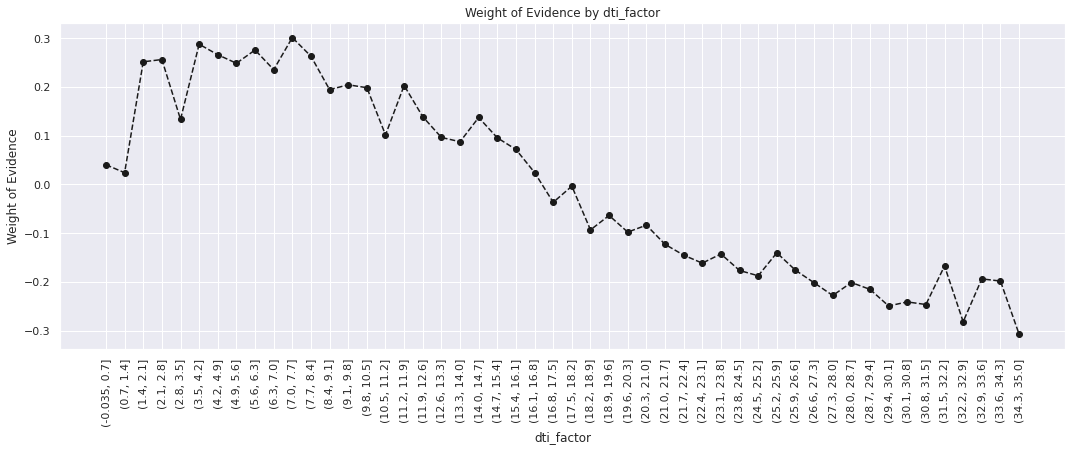

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [ ]:
# mths_since_last_record
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.764273    0.021691   830.0  256.0   
1                   (2.42, 4.84]     76   0.894737    0.001518    68.0    8.0   
2                   (4.84, 7.26]    163   0.914110    0.003256   149.0   14.0   
3                   (7.26, 9.68]    156   0.903846    0.003116   141.0   15.0   
4                   (9.68, 12.1]    292   0.907534    0.005832   265.0   27.0   
5                  (12.1, 14.52]    207   0.917874    0.004134   190.0   17.0   
6                 (14.52, 16.94]    210   0.928571    0.004194   195.0   15.0   
7                 (16.94, 19.36]    334   0.907186    0.006671   303.0   31.0   
8                 (19.36, 21.78]    283   0.936396    0.005652   265.0   18.0   
9                  (21.78, 24.2]    455   0.898901    0.009088   409.0   46.0   
10                 (24.2, 26.62]    339   0.905605    0.006771   307.0   32.0   
11                (26.62, 29.04]    612   0.900327    0.012224   551.0   61.0   
12                (29.04, 31.46]    451   0.906874    0.009008   409.0   42.0   
13                (31.46, 33.88]    487   0.921971    0.009727   449.0   38.0   
14                 (33.88, 36.3]    780   0.920513    0.015579   718.0   62.0   
15                 (36.3, 38.72]    659   0.936267    0.013162   617.0   42.0   
16                (38.72, 41.14]   1008   0.922619    0.020133   930.0   78.0   
17                (41.14, 43.56]    812   0.931034    0.016218   756.0   56.0   
18                (43.56, 45.98]    791   0.926675    0.015799   733.0   58.0   
19                 (45.98, 48.4]   1316   0.924772    0.026285  1217.0   99.0   
20                 (48.4, 50.82]    945   0.921693    0.018875   871.0   74.0   
21                (50.82, 53.24]   1536   0.908854    0.030679  1396.0  140.0   
22                (53.24, 55.66]   1062   0.912429    0.021212   969.0   93.0   
23                (55.66, 58.08]   1662   0.915764    0.033196  1522.0  140.0   
24                 (58.08, 60.5]   1095   0.914155    0.021871  1001.0   94.0   
25                 (60.5, 62.92]   1213   0.907667    0.024228  1101.0  112.0   
26                (62.92, 65.34]   1631   0.907419    0.032576  1480.0  151.0   
27                (65.34, 67.76]   1088   0.921875    0.021731  1003.0   85.0   
28                (67.76, 70.18]   1513   0.909451    0.030220  1376.0  137.0   
29                 (70.18, 72.6]   1041   0.906820    0.020792   944.0   97.0   
30                 (72.6, 75.02]   1420   0.900000    0.028362  1278.0  142.0   
31                (75.02, 77.44]    946   0.895349    0.018895   847.0   99.0   
32                (77.44, 79.86]    939   0.904153    0.018755   849.0   90.0   
33                (79.86, 82.28]   1351   0.887491    0.026984  1199.0  152.0   
34                 (82.28, 84.7]    724   0.885359    0.014461   641.0   83.0   
35                 (84.7, 87.12]   1350   0.858519    0.026964  1159.0  191.0   
36                (87.12, 89.54]    822   0.866180    0.016418   712.0  110.0   
37                (89.54, 91.96]    904   0.861726    0.018056   779.0  125.0   
38                (91.96, 94.38]   1492   0.867962    0.029800  1295.0  197.0   
39                 (94.38, 96.8]   1145   0.852402    0.022869   976.0  169.0   
40                 (96.8, 99.22]   1821   0.884130    0.036371  1610.0  211.0   
41               (99.22, 101.64]   1258   0.863275    0.025126  1086.0  172.0   
42              (101.64, 104.06]   2096   0.878340    0.041864  1841.0  255.0   
43              (104.06, 106.48]   1536   0.873047    0.030679  1341.0  195.0   
44               (106.48, 108.9]   1559   0.884541    0.031138  1379.0  180.0   
45               (108.9, 111.32]   2296   0.884146    0.045859  2030.0  266.0   
46              (111.32, 113.74]   1461   0.887064    0.029181  1296.0  165.0   
47              (113.74, 116.16]   2037   0.867943    0.040685  1768.0  269.0   
48              (116.16, 118.58]  

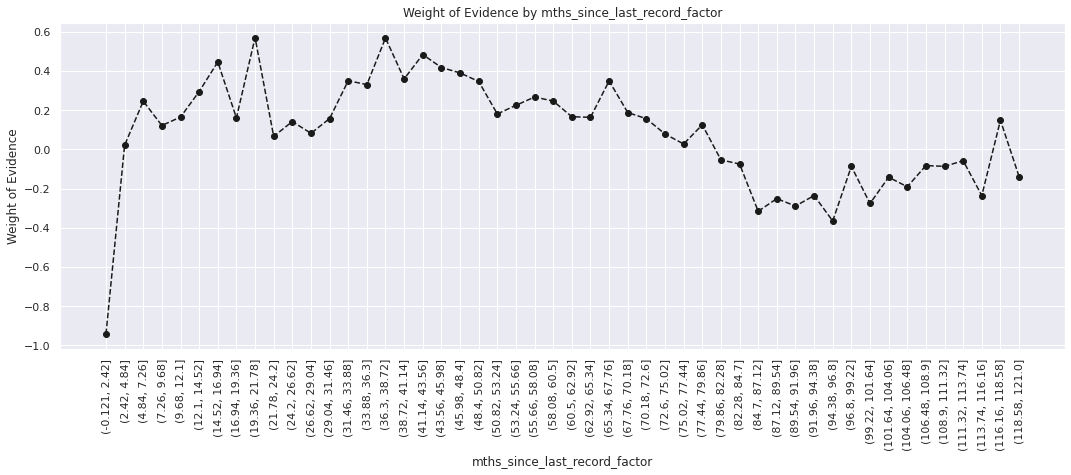

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

### Preprocessing the Test Dataset

In [ ]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_data_inputs_train.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
427211      427211  12796369   14818505      24000        24000   
206088      206088   1439740    1691948      10000        10000   
136020      136020   5214749    6556909      20425        20425   
412305      412305  13827698   15890016      17200        17200   
36159        36159    422455     496525       8400         8400   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
427211          24000.0   36 months      8.90       762.08     A        A5   
206088          10000.0   36 months     14.33       343.39     C        C1   
136020          20425.0   36 months      8.90       648.56     A        A5   
412305          17200.0   36 months     16.59       609.73     D        D1   
36159            7450.0   36 months     12.84       282.40     C        C2   

                               emp_title emp_length home_ownership  \
427211  Supervisor inventory management     3 years       MORTGAGE   
206088             mizuho corporate bank    6 years       MORTGAGE   
136020      Internal Medicine of Griffin  10+ years       MORTGAGE   
412305          Administrative Assistant    7 years           RENT   
36159                          Bank of A    5 years       MORTGAGE   

        annual_inc verification_status issue_d         loan_status pymnt_plan  \
427211     77000.0     Source Verified  Mar-14             Current          n   
206088    112000.0        Not Verified  Aug-12          Fully Paid          n   
136020     84000.0            Verified  Jun-13             Current          n   
412305     43000.0     Source Verified  Apr-14  Late (31-120 days)          n   
36159      94000.0            Verified  Jul-09         Charged Off          n   

                                                      url  \
427211  https://www.lendingclub.com/browse/loanDetail....   
206088  https://www.lendingclub.com/browse/loanDetail....   
136020  https://www.lendingclub.com/browse/loanDetail....   
412305  https://www.lendingclub.com/browse/loanDetail....   
36159   https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
427211    Borrower added on 03/12/14 > I have 5 credit...  debt_consolidation   
206088    Borrower added on 07/23/12 > I was looking f...  debt_consolidation   
136020                                                NaN  debt_consolidation   
412305                                                NaN  debt_consolidation   
36159   Unexpectd California tuition hike - Need help ...         educational   

                            title zip_code addr_state    dti  delinq_2yrs  \
427211         Debt consolidation    295xx         SC  21.91          0.0   
206088  Credit card consolidation    070xx         NJ   7.49          1.0   
136020                  Lend Club    302xx         GA  14.83          0.0   
412305         Debt consolidation    015xx         MA  13.68          1.0   
36159                Student Loan    913xx         CA  22.54          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
427211           Dec-86             1.0                     NaN   
206088           Dec-97             2.0                    18.0   
136020           Jul-91             1.0                    46.0   
412305           Oct-98             3.0                     6.0   
36159            Jul-98             1.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
427211                     NaN      20.0      0.0      30489        53.5   
206088                     NaN      15.0      0.0      15836        53.1   
136020                     NaN       9.0      0.0      29813        89.5   
412305                     NaN       9.0      0.0       7523        60.2   
36159                      NaN      14.0      0.0      65621        81.5   

        total_acc initial_list_status  out_prncp  o

In [ ]:
loan_data_targets_train.head()

427211    1
206088    1
136020    1
412305    0
36159     0
Name: good_bad, dtype: int64

In [ ]:
loan_data_inputs_test.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
362514      362514  19677589   21900299      32500        32500   
288564      288564  29755527   32278795      11000        11000   
213591      213591   1343334    1588314      30000        30000   
263083      263083  33131681   35775007      14400        14400   
165001      165001   3293168    4066358      15000        15000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
362514          32500.0   60 months     14.99       773.01     C        C5   
288564          11000.0   60 months     20.99       297.53     E        E4   
213591          30000.0   36 months     14.65      1034.83     C        C2   
263083          14400.0   60 months     14.49       338.74     C        C4   
165001          14900.0   36 months      8.90       476.30     A        A5   

                         emp_title emp_length home_ownership  annual_inc  \
362514  Licensed vocational nurse    < 1 year       MORTGAGE     65000.0   
288564               shift manager  10+ years       MORTGAGE     60000.0   
213591         FastMed urgent care     1 year       MORTGAGE    175000.0   
263083            Registered Nurse    2 years       MORTGAGE     66000.0   
165001               Courier Times  10+ years       MORTGAGE     85000.0   

       verification_status issue_d loan_status pymnt_plan  \
362514            Verified  Jul-14  Fully Paid          n   
288564            Verified  Oct-14     Current          n   
213591            Verified  Jun-12  Fully Paid          n   
263083     Source Verified  Nov-14     Current          n   
165001            Verified  Feb-13  Fully Paid          n   

                                                      url  \
362514  https://www.lendingclub.com/browse/loanDetail....   
288564  https://www.lendingclub.com/browse/loanDetail....   
213591  https://www.lendingclub.com/browse/loanDetail....   
263083  https://www.lendingclub.com/browse/loanDetail....   
165001  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
362514                                                NaN    home_improvement   
288564                                                NaN         credit_card   
213591    Borrower added on 06/06/12 > I am seeking a ...  debt_consolidation   
263083                                                NaN  debt_consolidation   
165001    Borrower added on 02/06/13 > I need to cosol...  debt_consolidation   

                          title zip_code addr_state    dti  delinq_2yrs  \
362514         Home improvement    950xx         CA   9.32          0.0   
288564  Credit card refinancing    472xx         IN  24.19          1.0   
213591       Debt Consolidation    852xx         AZ  13.34          0.0   
263083       Debt consolidation    498xx         MI  17.69          0.0   
165001         Consolidate 2013    190xx         PA   8.30          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
362514           Apr-02             0.0                     NaN   
288564           Aug-03             0.0                     3.0   
213591           Mar-02             0.0                    41.0   
263083           Aug-08             0.0                     NaN   
165001           Oct-86             0.0                    39.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
362514                     NaN       7.0      0.0       1208         4.3   
288564                     NaN      18.0      0.0      13129        54.7   
213591                     NaN       9.0      0.0       1906        22.4   
263083                     NaN      12.0      0.0      12944        74.4   
165001                     NaN       7.0      0.0       5902        67.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
362514       20.0                   f       0.00           0.00  38

In [ ]:
loan_data_targets_test.head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: good_bad, dtype: int64

In [ ]:
loan_data_inputs_test.shape

(93257, 323)

In [ ]:
loan_data_inputs_train.shape

(373028, 323)

In [ ]:
loan_data_inputs_train.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-2',
       'mths_since_last_record:3-20', 'mths_since_last_record:21-31',
       'mths_since_last_record:32-80', 'mths_since_last_record:81-86',
       'mths_since_last_record:>86'],
      dtype='object', length=323)

# Feature Selection

In [ ]:
# Selects a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [ ]:
# Stores the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# Drops the variables used to create dummy variables 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

In [ ]:
inputs_train.shape

(373028, 104)

In [ ]:
loan_data_inputs_train.shape

(373028, 323)

In [ ]:
loan_data_inputs_test.shape

(93257, 323)

# PD Model Estimation

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression()

In [ ]:
pd.options.display.max_rows = None

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
reg.intercept_

array([-1.33114802])

In [ ]:
reg.coef_

array([[ 1.16012978,  0.9060709 ,  0.70887543,  0.51906665,  0.33683541,
         0.1449069 ,  0.09080695,  0.10678467,  0.02967001,  0.05523126,
         0.05659134,  0.05939306,  0.07495672,  0.13242949,  0.09933701,
         0.18111117,  0.22490211,  0.22033152,  0.25913738,  0.3166083 ,
         0.51751621,  0.08806279, -0.01076066,  0.30677784,  0.20251685,
         0.21414719,  0.26666307,  0.05442766,  0.07806635,  0.10016899,
         0.12528906,  0.08958696,  0.06084275,  0.12334264,  1.07506131,
         0.87435868,  0.77403073,  0.57294535,  0.41064593,  0.165873  ,
        -0.0698239 ,  0.85052983,  0.53833733,  0.28958736,  0.10064173,
         0.05609966,  0.03781207,  0.0795331 ,  0.11952414,  0.12623129,
         0.07425905,  0.03129651,  0.63483938,  0.49144005,  0.28206423,
        -0.0110436 , -0.10865476, -0.134329  , -0.14973167, -0.15433271,
        -0.11935006, -0.20972273,  0.12264072,  0.17844693, -0.02093593,
         0.02535353,  0.21759694,  0.03468768,  0.0

In [ ]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [ ]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)

# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1

# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sorts the dataframe by index.
summary_table = summary_table.sort_index()

summary_table

Feature name  Coefficients
0                              Intercept     -1.331148
1                                grade:A      1.160130
2                                grade:B      0.906071
3                                grade:C      0.708875
4                                grade:D      0.519067
5                                grade:E      0.336835
6                                grade:F      0.144907
7                     home_ownership:OWN      0.090807
8                home_ownership:MORTGAGE      0.106785
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055231
11          addr_state:OK_TN_MO_LA_MD_NC      0.056591
12                         addr_state:CA      0.059393
13                addr_state:UT_KY_AZ_NJ      0.074957
14             addr_state:AR_MI_PA_OH_MN      0.132429
15             addr_state:RI_MA_DE_SD_IN      0.099337
16                   addr_state:GA_WA_OR      0.181111
17                      addr_state:WI_MT      0.224902
18                         addr_state:TX      0.220332
19                      addr_state:IL_CT      0.259137
20          addr_state:KS_SC_CO_VT_AK_MS      0.316608
21          addr_state:WV_NH_WY_DC_ME_ID      0.517516
22      verification_status:Not Verified      0.088063
23   verification_status:Source Verified     -0.010761
24                   purpose:credit_card      0.306778
25            purpose:debt_consolidation      0.202517
26            purpose:oth__med__vacation      0.214147
27   purpose:major_purch__car__home_impr      0.266663
28                 initial_list_status:w      0.054428
29                               term:36      0.078066
30                          emp_length:1      0.100169
31                        emp_length:2-4      0.125289
32                        emp_length:5-6      0.089587
33                        emp_length:7-9      0.060843
34                         emp_length:10      0.123343
35                mths_since_issue_d:<38      1.075061
36              mths_since_issue_d:38-39      0.874359
37              mths_since_issue_d:40-41      0.774031
38              mths_since_issue_d:42-48      0.572945
39              mths_since_issue_d:49-52      0.410646
40              mths_since_issue_d:53-64      0.165873
41              mths_since_issue_d:65-84     -0.069824
42                       int_rate:<9.548      0.850530
43                 int_rate:9.548-12.025      0.538337
44                 int_rate:12.025-15.74      0.289587
45                 int_rate:15.74-20.281      0.100642
46   mths_since_earliest_cr_line:141-164      0.056100
47   mths_since_earliest_cr_line:165-247      0.037812
48   mths_since_earliest_cr_line:248-270      0.079533
49   mths_since_earliest_cr_line:271-352      0.119524
50      mths_since_earliest_cr_line:>352      0.126231
51                         delinq_2yrs:0      0.074259
52                       delinq_2yrs:1-3      0.031297
53                      inq_last_6mths:0      0.634839
54                    inq_last_6mths:1-2      0.491440
55                    inq_last_6mths:3-6      0.282064
56                          open_acc:1-3     -0.011044
57                         open_acc:4-12     -0.108655
58                        open_acc:13-17     -0.134329
59                        open_acc:18-22     -0.149732
60                        open_acc:23-25     -0.154333
61                        open_acc:26-30     -0.119350
62                         open_acc:>=31     -0.209723
63                           pub_rec:3-4      0.122641
64                           pub_rec:>=5      0.178447
65                       total_acc:28-51     -0.020936
66                        total_acc:>=52      0.025354
67                    acc_now_delinq:>=1      0.217597
68               total_rev_hi_lim:5K-10K      0.034688
69              total_rev_hi_lim:10K-20K      0.002702
70              total_rev_hi_lim:20K-30K      0.001191
71              total_rev_hi_lim:30K-40K      0.014470
72           

## Building a Logistic Regression Model with P-Values

In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                              Intercept     -1.331148
1                                grade:A      1.160130
2                                grade:B      0.906071
3                                grade:C      0.708875
4                                grade:D      0.519067
5                                grade:E      0.336835
6                                grade:F      0.144907
7                     home_ownership:OWN      0.090807
8                home_ownership:MORTGAGE      0.106785
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055231
11          addr_state:OK_TN_MO_LA_MD_NC      0.056591
12                         addr_state:CA      0.059393
13                addr_state:UT_KY_AZ_NJ      0.074957
14             addr_state:AR_MI_PA_OH_MN      0.132429
15             addr_state:RI_MA_DE_SD_IN      0.099337
16                   addr_state:GA_WA_OR      0.181111
17                      addr_state:WI_MT      0.224902
18                         addr_state:TX      0.220332
19                      addr_state:IL_CT      0.259137
20          addr_state:KS_SC_CO_VT_AK_MS      0.316608
21          addr_state:WV_NH_WY_DC_ME_ID      0.517516
22      verification_status:Not Verified      0.088063
23   verification_status:Source Verified     -0.010761
24                   purpose:credit_card      0.306778
25            purpose:debt_consolidation      0.202517
26            purpose:oth__med__vacation      0.214147
27   purpose:major_purch__car__home_impr      0.266663
28                 initial_list_status:w      0.054428
29                               term:36      0.078066
30                          emp_length:1      0.100169
31                        emp_length:2-4      0.125289
32                        emp_length:5-6      0.089587
33                        emp_length:7-9      0.060843
34                         emp_length:10      0.123343
35                mths_since_issue_d:<38      1.075061
36              mths_since_issue_d:38-39      0.874359
37              mths_since_issue_d:40-41      0.774031
38              mths_since_issue_d:42-48      0.572945
39              mths_since_issue_d:49-52      0.410646
40              mths_since_issue_d:53-64      0.165873
41              mths_since_issue_d:65-84     -0.069824
42                       int_rate:<9.548      0.850530
43                 int_rate:9.548-12.025      0.538337
44                 int_rate:12.025-15.74      0.289587
45                 int_rate:15.74-20.281      0.100642
46   mths_since_earliest_cr_line:141-164      0.056100
47   mths_since_earliest_cr_line:165-247      0.037812
48   mths_since_earliest_cr_line:248-270      0.079533
49   mths_since_earliest_cr_line:271-352      0.119524
50      mths_since_earliest_cr_line:>352      0.126231
51                         delinq_2yrs:0      0.074259
52                       delinq_2yrs:1-3      0.031297
53                      inq_last_6mths:0      0.634839
54                    inq_last_6mths:1-2      0.491440
55                    inq_last_6mths:3-6      0.282064
56                          open_acc:1-3     -0.011044
57                         open_acc:4-12     -0.108655
58                        open_acc:13-17     -0.134329
59                        open_acc:18-22     -0.149732
60                        open_acc:23-25     -0.154333
61                        open_acc:26-30     -0.119350
62                         open_acc:>=31     -0.209723
63                           pub_rec:3-4      0.122641
64                           pub_rec:>=5      0.178447
65                       total_acc:28-51     -0.020936
66                        total_acc:>=52      0.025354
67                    acc_now_delinq:>=1      0.217597
68               total_rev_hi_lim:5K-10K      0.034688
69              total_rev_hi_lim:10K-20K      0.002702
70              total_rev_hi_lim:20K-30K      0.001191
71              total_rev_hi_lim:30K-40K      0.014470
72           

In [ ]:
p_values = reg.p_values

In [ ]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
summary_table['p_values'] = p_values

In [ ]:
# Summary table contains p-values
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.331148            NaN
1                                grade:A      1.160130   1.696016e-37
2                                grade:B      0.906071   1.035141e-49
3                                grade:C      0.708875   6.528209e-36
4                                grade:D      0.519067   4.991254e-22
5                                grade:E      0.336835   2.511111e-12
6                                grade:F      0.144907   3.856312e-03
7                     home_ownership:OWN      0.090807   6.792811e-06
8                home_ownership:MORTGAGE      0.106785   4.238292e-17
9                       addr_state:NM_VA      0.029670   3.545562e-01
10                         addr_state:NY      0.055231   2.305827e-02
11          addr_state:OK_TN_MO_LA_MD_NC      0.056591   1.483652e-02
12                         addr_state:CA      0.059393   5.218544e-03
13                addr_state:UT_KY_AZ_NJ      0.074957   2.687174e-03
14             addr_state:AR_MI_PA_OH_MN      0.132429   4.631378e-09
15             addr_state:RI_MA_DE_SD_IN      0.099337   8.973536e-04
16                   addr_state:GA_WA_OR      0.181111   1.237310e-11
17                      addr_state:WI_MT      0.224902   2.108272e-06
18                         addr_state:TX      0.220332   2.617949e-17
19                      addr_state:IL_CT      0.259137   8.602380e-19
20          addr_state:KS_SC_CO_VT_AK_MS      0.316608   1.162734e-24
21          addr_state:WV_NH_WY_DC_ME_ID      0.517516   2.419651e-22
22      verification_status:Not Verified      0.088063   2.146351e-09
23   verification_status:Source Verified     -0.010761   4.245820e-01
24                   purpose:credit_card      0.306778   4.107205e-27
25            purpose:debt_consolidation      0.202517   1.000554e-14
26            purpose:oth__med__vacation      0.214147   7.182025e-12
27   purpose:major_purch__car__home_impr      0.266663   1.887798e-17
28                 initial_list_status:w      0.054428   3.070698e-05
29                               term:36      0.078066   3.710079e-08
30                          emp_length:1      0.100169   1.145107e-04
31                        emp_length:2-4      0.125289   3.339277e-11
32                        emp_length:5-6      0.089587   2.876339e-05
33                        emp_length:7-9      0.060843   3.464382e-03
34                         emp_length:10      0.123343   2.306397e-11
35                mths_since_issue_d:<38      1.075061  4.445934e-171
36              mths_since_issue_d:38-39      0.874359  6.667857e-141
37              mths_since_issue_d:40-41      0.774031  3.734198e-116
38              mths_since_issue_d:42-48      0.572945   4.303805e-81
39              mths_since_issue_d:49-52      0.410646   1.080890e-37
40              mths_since_issue_d:53-64      0.165873   3.731144e-08
41              mths_since_issue_d:65-84     -0.069824   1.731684e-02
42                       int_rate:<9.548      0.850530   4.876484e-29
43                 int_rate:9.548-12.025      0.538337   4.538504e-33
44                 int_rate:12.025-15.74      0.289587   4.664694e-15
45                 int_rate:15.74-20.281      0.100642   5.515602e-04
46   mths_since_earliest_cr_line:141-164      0.056100   2.474431e-02
47   mths_since_earliest_cr_line:165-247      0.037812   6.352097e-02
48   mths_since_earliest_cr_line:248-270      0.079533   2.807681e-03
49   mths_since_earliest_cr_line:271-352      0.119524   5.818864e-07
50      mths_since_earliest_cr_line:>352      0.126231   3.088512e-06
51                         delinq_2yrs:0      0.074259   1.936983e-01
52                       delinq_2yrs:1-3      0.031297   5.603139e-01
53                      inq_last_6mths:0      0.634839   3.613258e-08
54                    inq_last_6mths:1-2      0.491440   1.950407e-05
55                    inq_last_6mths:3-6      0.282064   1.465878e-02
56                          open_acc:1

In [ ]:
# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

In [ ]:
inputs_train.shape

(373028, 84)

In [ ]:
loan_data_inputs_test.shape

(93257, 323)

In [ ]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
feature_name = inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept     -1.373966
1                               grade:A      1.123687
2                               grade:B      0.878901
3                               grade:C      0.684782
4                               grade:D      0.496920
5                               grade:E      0.321487
6                               grade:F      0.134287
7                    home_ownership:OWN      0.093525
8               home_ownership:MORTGAGE      0.106243
9                      addr_state:NM_VA      0.036015
10                        addr_state:NY      0.055557
11         addr_state:OK_TN_MO_LA_MD_NC      0.057993
12                        addr_state:CA      0.062146
13               addr_state:UT_KY_AZ_NJ      0.076453
14            addr_state:AR_MI_PA_OH_MN      0.133440
15            addr_state:RI_MA_DE_SD_IN      0.097894
16                  addr_state:GA_WA_OR      0.183762
17                     addr_state:WI_MT      0.237866
18                        addr_state:TX      0.220955
19                     addr_state:IL_CT      0.259898
20         addr_state:KS_SC_CO_VT_AK_MS      0.318555
21         addr_state:WV_NH_WY_DC_ME_ID      0.521970
22     verification_status:Not Verified      0.085711
23  verification_status:Source Verified     -0.011192
24                  purpose:credit_card      0.301872
25           purpose:debt_consolidation      0.198096
26           purpose:oth__med__vacation      0.212818
27  purpose:major_purch__car__home_impr      0.266264
28                initial_list_status:w      0.053822
29                              term:36      0.078941
30                         emp_length:1      0.099160
31                       emp_length:2-4      0.125859
32                       emp_length:5-6      0.091096
33                       emp_length:7-9      0.061147
34                        emp_length:10      0.125041
35               mths_since_issue_d:<38      1.084234
36             mths_since_issue_d:38-39      0.879219
37             mths_since_issue_d:40-41      0.778280
38             mths_since_issue_d:42-48      0.577200
39             mths_since_issue_d:49-52      0.415723
40             mths_since_issue_d:53-64      0.169966
41             mths_since_issue_d:65-84     -0.071758
42                      int_rate:<9.548      0.883099
43                int_rate:9.548-12.025      0.558677
44                int_rate:12.025-15.74      0.306136
45                int_rate:15.74-20.281      0.113186
46  mths_since_earliest_cr_line:141-164      0.055774
47  mths_since_earliest_cr_line:165-247      0.037170
48  mths_since_earliest_cr_line:248-270      0.079489
49  mths_since_earliest_cr_line:271-352      0.122049
50     mths_since_earliest_cr_line:>352      0.129363
51                     inq_last_6mths:0      0.666219
52                   inq_last_6mths:1-2      0.519712
53                   inq_last_6mths:3-6      0.309495
54                   acc_now_delinq:>=1      0.180379
55                   annual_inc:20K-30K     -0.081524
56                   annual_inc:30K-40K     -0.018932
57                   annual_inc:40K-50K      0.075678
58                   annual_inc:50K-60K      0.142544
59                   annual_inc:60K-70K      0.218097
60                   annual_inc:70K-80K      0.291542
61                   annual_inc:80K-90K      0.367400
62                  annual_inc:90K-100K      0.387191
63                 annual_inc:100K-120K      0.465095
64                 annual_inc:120K-140K      0.552385
65                     annual_inc:>140K      0.491536
66                            dti:<=1.4      0.252447
67                          dti:1.4-3.5      0.371534
68                          dti:3.5-7.7      0.384438
69                         dti:7.7-10.5      0.319703
70                        dti:10.5-16.1      0.241128
71                        dti:16.1-20.3      0.139822
72                        dti:20.3-21.7      0.127434
73                        dti:2

In [ ]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.373966            NaN
1                               grade:A      1.123687   3.209927e-35
2                               grade:B      0.878901   4.295257e-47
3                               grade:C      0.684782   6.733568e-34
4                               grade:D      0.496920   1.347617e-20
5                               grade:E      0.321487   1.026276e-11
6                               grade:F      0.134287   6.240631e-03
7                    home_ownership:OWN      0.093525   3.453472e-06
8               home_ownership:MORTGAGE      0.106243   4.438695e-17
9                      addr_state:NM_VA      0.036015   2.609003e-01
10                        addr_state:NY      0.055557   2.182899e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057993   1.226230e-02
12                        addr_state:CA      0.062146   3.377481e-03
13               addr_state:UT_KY_AZ_NJ      0.076453   2.150333e-03
14            addr_state:AR_MI_PA_OH_MN      0.133440   3.150846e-09
15            addr_state:RI_MA_DE_SD_IN      0.097894   1.033277e-03
16                  addr_state:GA_WA_OR      0.183762   5.573859e-12
17                     addr_state:WI_MT      0.237866   5.654098e-07
18                        addr_state:TX      0.220955   1.839185e-17
19                     addr_state:IL_CT      0.259898   5.680244e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318555   5.132459e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521970   1.070752e-22
22     verification_status:Not Verified      0.085711   4.390895e-09
23  verification_status:Source Verified     -0.011192   4.046642e-01
24                  purpose:credit_card      0.301872   1.246590e-26
25           purpose:debt_consolidation      0.198096   2.494750e-14
26           purpose:oth__med__vacation      0.212818   7.739555e-12
27  purpose:major_purch__car__home_impr      0.266264   1.472195e-17
28                initial_list_status:w      0.053822   3.744655e-05
29                              term:36      0.078941   1.631811e-08
30                         emp_length:1      0.099160   1.314054e-04
31                       emp_length:2-4      0.125859   2.590008e-11
32                       emp_length:5-6      0.091096   2.079746e-05
33                       emp_length:7-9      0.061147   3.285001e-03
34                        emp_length:10      0.125041   1.180108e-11
35               mths_since_issue_d:<38      1.084234  4.627026e-181
36             mths_since_issue_d:38-39      0.879219  1.004820e-149
37             mths_since_issue_d:40-41      0.778280  5.519589e-124
38             mths_since_issue_d:42-48      0.577200   1.052936e-87
39             mths_since_issue_d:49-52      0.415723   8.123891e-41
40             mths_since_issue_d:53-64      0.169966   5.913065e-09
41             mths_since_issue_d:65-84     -0.071758   1.411206e-02
42                      int_rate:<9.548      0.883099   3.600334e-31
43                int_rate:9.548-12.025      0.558677   5.907571e-36
44                int_rate:12.025-15.74      0.306136   7.236978e-17
45                int_rate:15.74-20.281      0.113186   9.338786e-05
46  mths_since_earliest_cr_line:141-164      0.055774   2.497248e-02
47  mths_since_earliest_cr_line:165-247      0.037170   6.418997e-02
48  mths_since_earliest_cr_line:248-270      0.079489   2.450798e-03
49  mths_since_earliest_cr_line:271-352      0.122049   1.889201e-07
50     mths_since_earliest_cr_line:>352      0.129363   1.068784e-06
51                     inq_last_6mths:0      0.666219   3.541992e-14
52                   inq_last_6mths:1-2      0.519712   3.258564e-09
53                   inq_last_6mths:3-6      0.309495   4.616790e-04
54                   acc_now_delinq:>=1      0.180379   8.865633e-02
55                   annual_inc:20K-30K     -0.081524   5.298609e-02
56                   annual_inc:30K-40K     -0.018932   6.400389e-01
57                   annu

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [ ]:
# Retains the same variables used in the final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                                    0                      1        0   
213591      

In [ ]:
loan_data_inputs_test.shape

(93257, 323)

In [ ]:
inputs_train.shape

(373028, 84)

In [ ]:
inputs_test.shape

(93257, 84)

In [ ]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs).
y_hat_test = reg2.model.predict(inputs_test)

In [ ]:
# This is an array of predicted discrete classess (in this case, 0s and 1s).
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs).
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [ ]:
# This is an array of arrays of predicted class probabilities for all classes.
y_hat_test_proba

array([[0.07569464, 0.92430536],
       [0.15076079, 0.84923921],
       [0.11465314, 0.88534686],
       ...,
       [0.02678685, 0.97321315],
       [0.04020901, 0.95979099],
       [0.04763361, 0.95236639]])

In [ ]:
# Returns only the probabilities for being 1 and stores these probabilities in a variable.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [ ]:
# This variable contains an array of probabilities of being 1.
y_hat_test_proba

array([0.92430536, 0.84923921, 0.88534686, ..., 0.97321315, 0.95979099,
       0.95236639])

In [ ]:
loan_data_targets_test_temp = loan_data_targets_test

In [ ]:
# Resets the index of test targets dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [ ]:
df_actual_predicted_probs.shape

(93257, 2)

In [ ]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [ ]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [ ]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
362514                       1          0.924305
288564                       1          0.849239
213591                       1          0.885347
263083                       1          0.940635
165001                       1          0.968664

### Accuracy and Area under the Curve

In [ ]:
# Classification indicator where every observation that has predicted probability 
# greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [ ]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted      0      1
Actual                 
0           7374   2816
1          35813  47254

In [ ]:
# Divides each value of the table by the total number of observations thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.079072  0.030196
1          0.384025  0.506707

In [ ]:
# Calculates Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5857790836076648

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.9926285 , 0.9926285 , 0.9906974 , ..., 0.4879038 , 0.39374711,
        0.37529854]))

In [ ]:
# Stores each of the three arrays in a separate variable. 
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

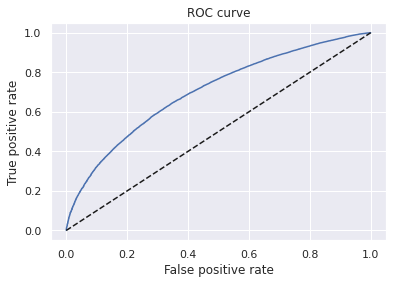

In [ ]:
# Plots the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022080045745732

### Gini and Kolmogorov-Smirnov

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [ ]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
42341                       1          0.375299           0
42344                       1          0.392108           0
39810                       0          0.393747           0
40518                       0          0.448971           0
42396                       0          0.457738           0

In [ ]:
df_actual_predicted_probs.tail()

loan_data_targets_test  y_hat_test_proba  y_hat_test
262480                       1          0.991292           1
231463                       1          0.991304           1
239228                       1          0.991652           1
261086                       1          0.992058           1
242624                       1          0.992628           1

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [ ]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  42341                       1          0.375299           0
1  42344                       1          0.392108           0
2  39810                       0          0.393747           0
3  40518                       0          0.448971           0
4  42396                       0          0.457738           0

In [ ]:
# Calculates the cumulative number of all observations.
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# Calculates cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# Calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [ ]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.375299           0   
1  42344                       1          0.392108           0   
2  39810                       0          0.393747           0   
3  40518                       0          0.448971           0   
4  42396                       0          0.457738           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  1                 0  
1                        2                  2                 0  
2                        3                  2                 1  
3                        4                  2                 2  
4                        5                  2                 3

In [ ]:
# Calculates the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

# Calculates cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

# Calculates the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [ ]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.375299           0   
1  42344                       1          0.392108           0   
2  39810                       0          0.393747           0   
3  40518                       0          0.448971           0   
4  42396                       0          0.457738           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  1                 0   
1                        2                  2                 0   
2                        3                  2                 1   
3                        4                  2                 2   
4                        5                  2                 3   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011              0.000012             0.000000  
1                    0.000021              0.000024             0.000000  
2                    0.000032              0.000024             0.000098  
3                    0.000043              0.000024             0.000196  
4                    0.000054              0.000024             0.000294

In [ ]:
df_actual_predicted_probs.tail()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
93252  262480                       1          0.991292           1   
93253  231463                       1          0.991304           1   
93254  239228                       1          0.991652           1   
93255  261086                       1          0.992058           1   
93256  242624                       1          0.992628           1   

       Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
93252                    93253              83063             10190   
93253                    93254              83064             10190   
93254                    93255              83065             10190   
93255                    93256              83066             10190   
93256                    93257              83067             10190   

       Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
93252                    0.999957              0.999952                  1.0  
93253                    0.999968              0.999964                  1.0  
93254                    0.999979              0.999976                  1.0  
93255                    0.999989              0.999988                  1.0  
93256                    1.000000              1.000000                  1.0

Text(0.5, 1.0, 'Gini')

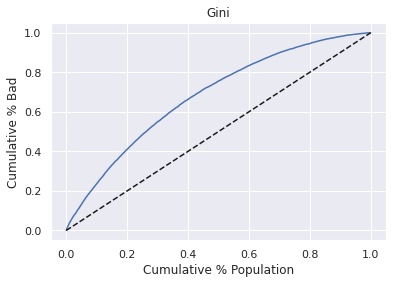

In [ ]:
# Plots Gini Curve
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [ ]:
Gini = AUROC * 2 - 1
Gini

0.40441600914914644

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

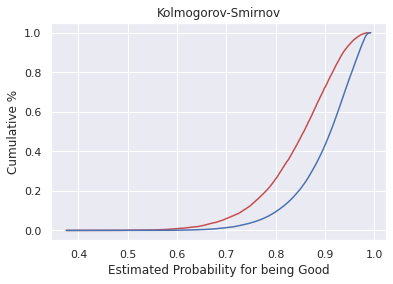

In [ ]:
# Plot Kolmogorov-Smirnov
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [ ]:
# Calculates Kolmogorov-Smirnov from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966746932223847

# Applying the PD Model

### Calculating PD of individual accounts

In [ ]:
pd.options.display.max_columns = None

In [ ]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [ ]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.373966            NaN
1                               grade:A      1.123687   3.209927e-35
2                               grade:B      0.878901   4.295257e-47
3                               grade:C      0.684782   6.733568e-34
4                               grade:D      0.496920   1.347617e-20
5                               grade:E      0.321487   1.026276e-11
6                               grade:F      0.134287   6.240631e-03
7                    home_ownership:OWN      0.093525   3.453472e-06
8               home_ownership:MORTGAGE      0.106243   4.438695e-17
9                      addr_state:NM_VA      0.036015   2.609003e-01
10                        addr_state:NY      0.055557   2.182899e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057993   1.226230e-02
12                        addr_state:CA      0.062146   3.377481e-03
13               addr_state:UT_KY_AZ_NJ      0.076453   2.150333e-03
14            addr_state:AR_MI_PA_OH_MN      0.133440   3.150846e-09
15            addr_state:RI_MA_DE_SD_IN      0.097894   1.033277e-03
16                  addr_state:GA_WA_OR      0.183762   5.573859e-12
17                     addr_state:WI_MT      0.237866   5.654098e-07
18                        addr_state:TX      0.220955   1.839185e-17
19                     addr_state:IL_CT      0.259898   5.680244e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318555   5.132459e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521970   1.070752e-22
22     verification_status:Not Verified      0.085711   4.390895e-09
23  verification_status:Source Verified     -0.011192   4.046642e-01
24                  purpose:credit_card      0.301872   1.246590e-26
25           purpose:debt_consolidation      0.198096   2.494750e-14
26           purpose:oth__med__vacation      0.212818   7.739555e-12
27  purpose:major_purch__car__home_impr      0.266264   1.472195e-17
28                initial_list_status:w      0.053822   3.744655e-05
29                              term:36      0.078941   1.631811e-08
30                         emp_length:1      0.099160   1.314054e-04
31                       emp_length:2-4      0.125859   2.590008e-11
32                       emp_length:5-6      0.091096   2.079746e-05
33                       emp_length:7-9      0.061147   3.285001e-03
34                        emp_length:10      0.125041   1.180108e-11
35               mths_since_issue_d:<38      1.084234  4.627026e-181
36             mths_since_issue_d:38-39      0.879219  1.004820e-149
37             mths_since_issue_d:40-41      0.778280  5.519589e-124
38             mths_since_issue_d:42-48      0.577200   1.052936e-87
39             mths_since_issue_d:49-52      0.415723   8.123891e-41
40             mths_since_issue_d:53-64      0.169966   5.913065e-09
41             mths_since_issue_d:65-84     -0.071758   1.411206e-02
42                      int_rate:<9.548      0.883099   3.600334e-31
43                int_rate:9.548-12.025      0.558677   5.907571e-36
44                int_rate:12.025-15.74      0.306136   7.236978e-17
45                int_rate:15.74-20.281      0.113186   9.338786e-05
46  mths_since_earliest_cr_line:141-164      0.055774   2.497248e-02
47  mths_since_earliest_cr_line:165-247      0.037170   6.418997e-02
48  mths_since_earliest_cr_line:248-270      0.079489   2.450798e-03
49  mths_since_earliest_cr_line:271-352      0.122049   1.889201e-07
50     mths_since_earliest_cr_line:>352      0.129363   1.068784e-06
51                     inq_last_6mths:0      0.666219   3.541992e-14
52                   inq_last_6mths:1-2      0.519712   3.258564e-09
53                   inq_last_6mths:3-6      0.309495   4.616790e-04
54                   acc_now_delinq:>=1      0.180379   8.865633e-02
55                   annual_inc:20K-30K     -0.081524   5.298609e-02
56                   annual_inc:30K-40K     -0.018932   6.400389e-01
57                   annu

In [ ]:
y_hat_test_proba

array([0.92430536, 0.84923921, 0.88534686, ..., 0.97321315, 0.95979099,
       0.95236639])

### Creating a Scorecard

In [ ]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.373966            NaN
1                               grade:A      1.123687   3.209927e-35
2                               grade:B      0.878901   4.295257e-47
3                               grade:C      0.684782   6.733568e-34
4                               grade:D      0.496920   1.347617e-20
5                               grade:E      0.321487   1.026276e-11
6                               grade:F      0.134287   6.240631e-03
7                    home_ownership:OWN      0.093525   3.453472e-06
8               home_ownership:MORTGAGE      0.106243   4.438695e-17
9                      addr_state:NM_VA      0.036015   2.609003e-01
10                        addr_state:NY      0.055557   2.182899e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057993   1.226230e-02
12                        addr_state:CA      0.062146   3.377481e-03
13               addr_state:UT_KY_AZ_NJ      0.076453   2.150333e-03
14            addr_state:AR_MI_PA_OH_MN      0.133440   3.150846e-09
15            addr_state:RI_MA_DE_SD_IN      0.097894   1.033277e-03
16                  addr_state:GA_WA_OR      0.183762   5.573859e-12
17                     addr_state:WI_MT      0.237866   5.654098e-07
18                        addr_state:TX      0.220955   1.839185e-17
19                     addr_state:IL_CT      0.259898   5.680244e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318555   5.132459e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521970   1.070752e-22
22     verification_status:Not Verified      0.085711   4.390895e-09
23  verification_status:Source Verified     -0.011192   4.046642e-01
24                  purpose:credit_card      0.301872   1.246590e-26
25           purpose:debt_consolidation      0.198096   2.494750e-14
26           purpose:oth__med__vacation      0.212818   7.739555e-12
27  purpose:major_purch__car__home_impr      0.266264   1.472195e-17
28                initial_list_status:w      0.053822   3.744655e-05
29                              term:36      0.078941   1.631811e-08
30                         emp_length:1      0.099160   1.314054e-04
31                       emp_length:2-4      0.125859   2.590008e-11
32                       emp_length:5-6      0.091096   2.079746e-05
33                       emp_length:7-9      0.061147   3.285001e-03
34                        emp_length:10      0.125041   1.180108e-11
35               mths_since_issue_d:<38      1.084234  4.627026e-181
36             mths_since_issue_d:38-39      0.879219  1.004820e-149
37             mths_since_issue_d:40-41      0.778280  5.519589e-124
38             mths_since_issue_d:42-48      0.577200   1.052936e-87
39             mths_since_issue_d:49-52      0.415723   8.123891e-41
40             mths_since_issue_d:53-64      0.169966   5.913065e-09
41             mths_since_issue_d:65-84     -0.071758   1.411206e-02
42                      int_rate:<9.548      0.883099   3.600334e-31
43                int_rate:9.548-12.025      0.558677   5.907571e-36
44                int_rate:12.025-15.74      0.306136   7.236978e-17
45                int_rate:15.74-20.281      0.113186   9.338786e-05
46  mths_since_earliest_cr_line:141-164      0.055774   2.497248e-02
47  mths_since_earliest_cr_line:165-247      0.037170   6.418997e-02
48  mths_since_earliest_cr_line:248-270      0.079489   2.450798e-03
49  mths_since_earliest_cr_line:271-352      0.122049   1.889201e-07
50     mths_since_earliest_cr_line:>352      0.129363   1.068784e-06
51                     inq_last_6mths:0      0.666219   3.541992e-14
52                   inq_last_6mths:1-2      0.519712   3.258564e-09
53                   inq_last_6mths:3-6      0.309495   4.616790e-04
54                   acc_now_delinq:>=1      0.180379   8.865633e-02
55                   annual_inc:20K-30K     -0.081524   5.298609e-02
56                   annual_inc:30K-40K     -0.018932   6.400389e-01
57                   annu

In [ ]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])

df_ref_categories['Coefficients'] = 0

df_ref_categories['p_values'] = np.nan

df_ref_categories

Feature name  Coefficients  p_values
0                                        grade:G             0       NaN
1             home_ownership:RENT_OTHER_NONE_ANY             0       NaN
2                addr_state:ND_NE_IA_NV_FL_HI_AL             0       NaN
3                   verification_status:Verified             0       NaN
4   purpose:educ__sm_b__wedd__ren_en__mov__house             0       NaN
5                          initial_list_status:f             0       NaN
6                                        term:60             0       NaN
7                                   emp_length:0             0       NaN
8                         mths_since_issue_d:>84             0       NaN
9                               int_rate:>20.281             0       NaN
10              mths_since_earliest_cr_line:<140             0       NaN
11                             inq_last_6mths:>6             0       NaN
12                              acc_now_delinq:0             0       NaN
13                               annual_inc:<20K             0       NaN
14                                       dti:>35             0       NaN
15                    mths_since_last_delinq:0-3             0       NaN
16                    mths_since_last_record:0-2             0       NaN

In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])

df_scorecard = df_scorecard.reset_index()

df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
# Sets min and max scores
min_score = 300
max_score = 850

In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.373966
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081524
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071758
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011192
Name: Coefficients, dtype: float64

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5384391557276906

In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.373966
acc_now_delinq                 0.180379
addr_state                     0.521970
annual_inc                     0.552385
dti                            0.384438
emp_length                     0.125859
grade                          1.123687
home_ownership                 0.106243
initial_list_status            0.053822
inq_last_6mths                 0.666219
int_rate                       0.883099
mths_since_earliest_cr_line    0.129363
mths_since_issue_d             1.084234
mths_since_last_delinq         0.183077
mths_since_last_record         0.502918
purpose                        0.301872
term                           0.078941
verification_status            0.085711
Name: Coefficients, dtype: float64

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.5902511950610005

In [ ]:
# Multiplies the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [ ]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

853.0

### Caclulating Credit Score

In [ ]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [ ]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514        0                                   0                   0   
288564        0                                   0                   0   
213591        0                                   0                   0   
263083        0                                   0                   0   
165001        0                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1  

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                   

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [ ]:
scorecard_scores.shape

(102,)

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [ ]:
scorecard_scores.shape

(102, 1)

In [ ]:
# Multiplies the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sums them. It's essentially the sum of the products.
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [ ]:
y_scores.head()

0
362514  614.0
288564  553.0
213591  579.0
263083  633.0
165001  685.0

In [ ]:
y_scores.tail()

0
115     573.0
296284  678.0
61777   696.0
91763   664.0
167512  651.0

In [ ]:
y_scores.max()

0    799.0
dtype: float64

### From Credit Score to PD

In [ ]:
# Divides the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, multiplies that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# and adds the minimum sum of coefficients.
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [ ]:
# Divides an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

0
362514  0.926314
288564  0.850783
213591  0.888722
263083  0.941457
165001  0.969280

In [ ]:
y_hat_test_proba[0: 5]

array([0.92430536, 0.84923921, 0.88534686, 0.94063508, 0.96866433])

In [ ]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.375299
1    0.392108
2    0.393747
3    0.448971
4    0.457738
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [ ]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted      0      1
Actual                 
0           7374   2816
1          35813  47254

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.079072  0.030196
1          0.384025  0.506707

In [ ]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5857790836076648

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.9926285 , 0.9926285 , 0.9906974 , ..., 0.4879038 , 0.39374711,
        0.37529854]))

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

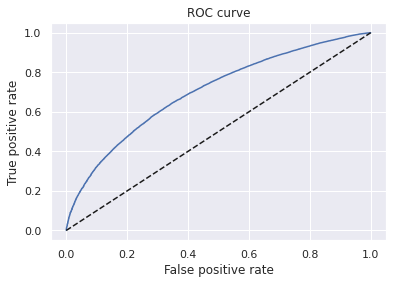

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
thresholds

array([1.9926285 , 0.9926285 , 0.9906974 , ..., 0.4879038 , 0.39374711,
       0.37529854])

In [ ]:
thresholds.shape

(17309,)

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [ ]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr
0    1.992628  0.000000  0.000000
1    0.992628  0.000000  0.000012
2    0.990697  0.000000  0.000120
3    0.990653  0.000098  0.000120
4    0.989823  0.000098  0.000421

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [ ]:
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr   Score
0    1.000000  0.000000  0.000000  3253.0
1    0.992628  0.000000  0.000012   797.0
2    0.990697  0.000000  0.000120   779.0
3    0.990653  0.000098  0.000120   778.0
4    0.989823  0.000098  0.000421   772.0

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr  Score
0    1.000000  0.000000  0.000000  850.0
1    0.992628  0.000000  0.000012  797.0
2    0.990697  0.000000  0.000120  779.0
3    0.990653  0.000098  0.000120  778.0
4    0.989823  0.000098  0.000421  772.0

In [ ]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score
17304    0.493423  0.999411  0.999964  417.0
17305    0.488605  0.999607  0.999964  415.0
17306    0.487904  0.999607  0.999976  415.0
17307    0.393747  1.000000  0.999976  385.0
17308    0.375299  1.000000  1.000000  379.0

In [ ]:
# Defines a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
0    1.000000  0.000000  0.000000  850.0           0       93257   
1    0.992628  0.000000  0.000012  797.0           1       93256   
2    0.990697  0.000000  0.000120  779.0          10       93247   
3    0.990653  0.000098  0.000120  778.0          11       93246   
4    0.989823  0.000098  0.000421  772.0          36       93221   

   Approval Rate  Rejection Rate  
0       0.000000        1.000000  
1       0.000011        0.999989  
2       0.000107        0.999893  
3       0.000118        0.999882  
4       0.000386        0.999614

In [ ]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
17304    0.493423  0.999411  0.999964  417.0       93248           9   
17305    0.488605  0.999607  0.999964  415.0       93250           7   
17306    0.487904  0.999607  0.999976  415.0       93251           6   
17307    0.393747  1.000000  0.999976  385.0       93255           2   
17308    0.375299  1.000000  1.000000  379.0       93257           0   

       Approval Rate  Rejection Rate  
17304       0.999903        0.000097  
17305       0.999925        0.000075  
17306       0.999936        0.000064  
17307       0.999979        0.000021  
17308       1.000000        0.000000

In [ ]:
df_cutoffs.iloc[5000: 6200, ]

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
5000    0.903624  0.259078  0.547426  591.0       48113       45144   
5001    0.903619  0.259078  0.547462  591.0       48116       45141   
5002    0.903615  0.259176  0.547462  591.0       48117       45140   
5003    0.903596  0.259176  0.547618  591.0       48130       45127   
5004    0.903595  0.259274  0.547618  591.0       48131       45126   
5005    0.903590  0.259274  0.547678  591.0       48136       45121   
5006    0.903583  0.259470  0.547678  591.0       48138       45119   
5007    0.903547  0.259470  0.547919  591.0       48158       45099   
5008    0.903546  0.259568  0.547919  591.0       48159       45098   
5009    0.903509  0.259568  0.548136  591.0       48177       45080   
5010    0.903508  0.259666  0.548136  591.0       48178       45079   
5011    0.903481  0.259666  0.548328  591.0       48194       45063   
5012    0.903481  0.259764  0.548328  591.0       48195       45062   
5013    0.903472  0.259764  0.548413  591.0       48202       45055   
5014    0.903471  0.259863  0.548413  591.0       48203       45054   
5015    0.903453  0.259863  0.548593  591.0       48218       45039   
5016    0.903452  0.259961  0.548593  591.0       48219       45038   
5017    0.903427  0.259961  0.548762  591.0       48233       45024   
5018    0.903424  0.260059  0.548762  591.0       48234       45023   
5019    0.903423  0.260059  0.548774  591.0       48235       45022   
5020    0.903422  0.260255  0.548774  591.0       48237       45020   
5021    0.903409  0.260255  0.548822  591.0       48241       45016   
5022    0.903408  0.260353  0.548822  591.0       48242       45015   
5023    0.903376  0.260353  0.549027  591.0       48259       44998   
5024    0.903376  0.260451  0.549027  591.0       48260       44997   
5025    0.903375  0.260451  0.549051  591.0       48262       44995   
5026    0.903375  0.260550  0.549051  591.0       48263       44994   
5027    0.903235  0.260550  0.549617  591.0       48310       44947   
5028    0.903235  0.260648  0.549617  591.0       48311       44946   
5029    0.903195  0.260648  0.549893  591.0       48334       44923   
5030    0.903194  0.260746  0.549893  591.0       48335       44922   
5031    0.903187  0.260746  0.549918  591.0       48337       44920   
5032    0.903186  0.260844  0.549918  591.0       48338       44919   
5033    0.903165  0.260844  0.550050  591.0       48349       44908   
5034    0.903164  0.260942  0.550050  591.0       48350       44907   
5035    0.903135  0.260942  0.550267  591.0       48368       44889   
5036    0.903127  0.261138  0.550267  591.0       48370       44887   
5037    0.903127  0.261138  0.550279  591.0       48371       44886   
5038    0.903124  0.261237  0.550279  591.0       48372       44885   
5039    0.903069  0.261237  0.550568  591.0       48396       44861   
5040    0.903064  0.261335  0.550568  591.0       48397       44860   
5041    0.903061  0.261335  0.550592  591.0       48399       44858   
5042    0.903059  0.261433  0.550592  591.0       48400       44857   
5043    0.903050  0.261433  0.550676  591.0       48407       44850   
5044    0.903049  0.261531  0.550676  591.0       48408       44849   
5045    0.903047  0.261531  0.550688  591.0       48409       44848   
5046    0.903046  0.261629  0.550688  591.0       48410       44847   
5047    0.903024  0.261629  0.550796  591.0       48419       44838   
5048    0.903022  0.261727  0.550796  591.0       48420       44837   
5049    0.902995  0.261727  0.551001  591.0       48437       44820   
5050    0.902995  0.261825  0.551001  591.0       48438       44819   
5051    0.902961  0.261825  0.551182  591.0       48453       44804   
5052    0.902961  0.261923  0.551182  591.0       48454       44803   
5053    0.902950  0.261923  0.551266  591.0       48461       44796   
5054    0.902949  0.262022  0.551266  591.0       48462       44795   
5055    0.902938  0.262022  0.

In [ ]:
df_cutoffs.iloc[1000: 2000, ]

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
1000    0.953190  0.049460  0.207026  651.0       17701       75556   
1001    0.953182  0.049460  0.207062  651.0       17704       75553   
1002    0.953182  0.049558  0.207062  651.0       17705       75552   
1003    0.953142  0.049558  0.207278  651.0       17723       75534   
1004    0.953138  0.049657  0.207278  651.0       17724       75533   
1005    0.953105  0.049657  0.207459  651.0       17739       75518   
1006    0.953104  0.049755  0.207459  651.0       17740       75517   
1007    0.953016  0.049755  0.208073  651.0       17791       75466   
1008    0.953015  0.049853  0.208073  651.0       17792       75465   
1009    0.952899  0.049853  0.208819  651.0       17854       75403   
1010    0.952897  0.049951  0.208819  651.0       17855       75402   
1011    0.952892  0.049951  0.208880  651.0       17860       75397   
1012    0.952891  0.050049  0.208880  651.0       17861       75396   
1013    0.952805  0.050049  0.209409  651.0       17905       75352   
1014    0.952802  0.050147  0.209409  651.0       17906       75351   
1015    0.952788  0.050147  0.209518  651.0       17915       75342   
1016    0.952783  0.050245  0.209518  651.0       17916       75341   
1017    0.952779  0.050245  0.209554  651.0       17919       75338   
1018    0.952779  0.050343  0.209554  651.0       17920       75337   
1019    0.952701  0.050343  0.210071  650.0       17963       75294   
1020    0.952699  0.050442  0.210071  650.0       17964       75293   
1021    0.952686  0.050442  0.210204  650.0       17975       75282   
1022    0.952686  0.050540  0.210204  650.0       17976       75281   
1023    0.952586  0.050540  0.210842  650.0       18029       75228   
1024    0.952584  0.050638  0.210842  650.0       18030       75227   
1025    0.952500  0.050638  0.211335  650.0       18071       75186   
1026    0.952498  0.050736  0.211335  650.0       18072       75185   
1027    0.952413  0.050736  0.211949  650.0       18123       75134   
1028    0.952412  0.050834  0.211949  650.0       18124       75133   
1029    0.952410  0.050834  0.211961  650.0       18125       75132   
1030    0.952406  0.051030  0.211961  650.0       18127       75130   
1031    0.952385  0.051030  0.212082  650.0       18137       75120   
1032    0.952385  0.051129  0.212082  650.0       18138       75119   
1033    0.952379  0.051129  0.212142  650.0       18143       75114   
1034    0.952379  0.051227  0.212142  650.0       18144       75113   
1035    0.952347  0.051227  0.212407  650.0       18166       75091   
1036    0.952346  0.051325  0.212407  650.0       18167       75090   
1037    0.952335  0.051325  0.212491  650.0       18174       75083   
1038    0.952334  0.051423  0.212491  650.0       18175       75082   
1039    0.952327  0.051423  0.212599  650.0       18184       75073   
1040    0.952326  0.051521  0.212599  650.0       18185       75072   
1041    0.952308  0.051521  0.212720  650.0       18195       75062   
1042    0.952305  0.051619  0.212720  650.0       18196       75061   
1043    0.952273  0.051619  0.212900  650.0       18211       75046   
1044    0.952268  0.051816  0.212900  650.0       18213       75044   
1045    0.952233  0.051816  0.213033  650.0       18224       75033   
1046    0.952232  0.051914  0.213033  650.0       18225       75032   
1047    0.952224  0.051914  0.213117  650.0       18232       75025   
1048    0.952222  0.052012  0.213117  650.0       18233       75024   
1049    0.952212  0.052012  0.213213  650.0       18241       75016   
1050    0.952206  0.052110  0.213213  650.0       18242       75015   
1051    0.952143  0.052110  0.213538  649.0       18269       74988   
1052    0.952142  0.052208  0.213538  649.0       18270       74987   
1053    0.952129  0.052208  0.213635  649.0       18278       74979   
1054    0.952126  0.052404  0.213635  649.0       18280       74977   
1055    0.952057  0.052404  0.

In [ ]:
inputs_train_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
427211        1        0        0        0        0        0        0   
206088        0        0        1        0        0        0        0   
136020        1        0        0        0        0        0        0   
412305        0        0        0        1        0        0        0   
36159         0        0        1        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
427211                                   0                   0   
206088                                   0                   0   
136020                                   0                   0   
412305                                   1                   0   
36159                                    0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
427211                        1                                0   
206088                        1                                0   
136020                        1                                0   
412305                        0                                0   
36159                         1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
427211                 0              0                             0   
206088                 0              0                             0   
136020                 0              0                             0   
412305                 0              0                             0   
36159                  0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211              0                       0                          0   
206088              0                       1                          0   
136020              0                       0                          0   
412305              0                       0                          0   
36159               1                       0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
427211                                    1                             0   
206088                                    0                             0   
136020                                    0                             1   
412305                                    1                             0   
36159                                     0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [ ]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.373966   
1        1                                       grade:A      1.123687   
2        2                                       grade:B      0.878901   
3        3                                       grade:C      0.684782   
4        4                                       grade:D      0.496920   
5        5                                       grade:E      0.321487   
6        6                                       grade:F      0.134287   
7        7                            home_ownership:OWN      0.093525   
8        8                       home_ownership:MORTGAGE      0.106243   
9        9                              addr_state:NM_VA      0.036015   
10      10                                 addr_state:NY      0.055557   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057993   
12      12                                 addr_state:CA      0.062146   
13      13                        addr_state:UT_KY_AZ_NJ      0.076453   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133440   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097894   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237866   
18      18                                 addr_state:TX      0.220955   
19      19                              addr_state:IL_CT      0.259898   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318555   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521970   
22      22              verification_status:Not Verified      0.085711   
23      23           verification_status:Source Verified     -0.011192   
24      24                           purpose:credit_card      0.301872   
25      25                    purpose:debt_consolidation      0.198096   
26      26                    purpose:oth__med__vacation      0.212818   
27      27           purpose:major_purch__car__home_impr      0.266264   
28      28                         initial_list_status:w      0.053822   
29      29                                       term:36      0.078941   
30      30                                  emp_length:1      0.099160   
31      31                                emp_length:2-4      0.125859   
32      32                                emp_length:5-6      0.091096   
33      33                                emp_length:7-9      0.061147   
34      34                                 emp_length:10      0.125041   
35      35                        mths_since_issue_d:<38      1.084234   
36      36                      mths_since_issue_d:38-39      0.879219   
37      37                      mths_since_issue_d:40-41      0.778280   
38      38                      mths_since_issue_d:42-48      0.577200   
39      39                      mths_since_issue_d:49-52      0.415723   
40      40                      mths_since_issue_d:53-64      0.169966   
41      41                      mths_since_issue_d:65-84     -0.071758   
42      42                               int_rate:<9.548      0.883099   
43      43                         int_rate:9.548-12.025      0.558677   
44      44                         int_rate:12.025-15.74      0.306136   
45      45                         int_rate:15.74-20.281      0.113186   
46      46           mths_since_earliest_cr_line:141-164      0.055774   
47      47           mths_since_earliest_cr_line:165-247      0.037170   
48      48           mths_since_earliest_cr_line:248-270      0.079489   
49      49           mths_since_earliest_cr_line:271-352      0.122049   
50      50              mths_since_earliest_cr_line:>352      0.129363   
51      51                              inq_last_6mths:0      0.666219   
52      52                            inq_last_6mths:1-2      0.519712   
53      5

# LGD Model

In [ ]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [ ]:
# Accounts that were charged-off (written-off).
loan_data_defaults = loan_data[loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)'])]

In [ ]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3815
emp_length                                                          2786
home_ownership                                     

## Independent Variables

In [ ]:
# Fill the missing values with zeroes.
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

## Dependent Variables

In [ ]:
# Calculates the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Shows descriptive statisics for recovery rate column.
loan_data_defaults['recovery_rate'].describe()

count    50968.000000
mean         0.051594
std          0.085511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101773
max          1.220774
Name: recovery_rate, dtype: float64

In [ ]:
# Sets recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
loan_data_defaults['recovery_rate'].describe()

count    50968.000000
mean         0.051551
std          0.085001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101773
max          1.000000
Name: recovery_rate, dtype: float64

In [ ]:
# Calculates the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
loan_data_defaults['CCF'].describe()

count    50968.000000
mean         0.719322
std          0.204788
min          0.000000
25%          0.608275
50%          0.769436
75%          0.876693
max          1.000000
Name: CCF, dtype: float64

## Explore Dependent Variables

(array([2.8383e+04, 3.7200e+02, 6.4200e+02, 1.1950e+03, 1.9300e+03,
        1.9430e+03, 6.4500e+02, 7.4900e+02, 8.9700e+02, 1.2360e+03,
        1.5530e+03, 1.7910e+03, 2.3140e+03, 2.4510e+03, 1.0410e+03,
        6.7200e+02, 7.0600e+02, 4.7300e+02, 1.9600e+02, 2.1000e+02,
        1.8600e+02, 1.5500e+02, 1.5900e+02, 1.1500e+02, 5.6000e+01,
        6.1000e+01, 4.2000e+01, 5.1000e+01, 4.6000e+01, 3.5000e+01,
        4.0000e+01, 3.3000e+01, 2.9000e+01, 2.5000e+01, 3.2000e+01,
        4.0000e+01, 2.7000e+01, 3.0000e+01, 1.6000e+01, 1.4000e+01,
        2.7000e+01, 2.0000e+01, 1.7000e+01, 1.0000e+01, 6.0000e+00,
        1.1000e+01, 5.0000e+00, 1.0000e+01, 1.1000e+01, 9.0000e+00,
        1.2000e+01, 1.1000e+01, 9.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.00

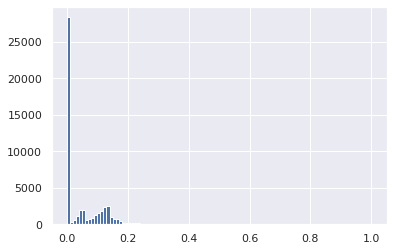

In [ ]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)

(array([  21.,   21.,   20.,   79.,   24.,   18.,  103.,   39.,   12.,
          81.,  101.,   25.,   72.,  120.,   40.,   67.,  112.,   76.,
          69.,  150.,  113.,   82.,  153.,  109.,  117.,  145.,  163.,
         146.,  163.,  149.,  178.,  193.,  184.,  187.,  216.,  212.,
         198.,  250.,  249.,  223.,  273.,  268.,  243.,  262.,  320.,
         319.,  356.,  297.,  381.,  359.,  357.,  383.,  439.,  358.,
         455.,  476.,  487.,  492.,  518.,  520.,  571.,  569.,  597.,
         630.,  580.,  672.,  705.,  693.,  787.,  799.,  915.,  917.,
         813.,  989., 1010.,  943., 1091.,  986., 1089., 1075., 1069.,
        1243., 1086., 1381., 1217., 1248., 1539., 1190., 1503., 1161.,
        1450., 1314.,  959., 1415.,  797., 1316.,  583.,  949.,  343.,
         531.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

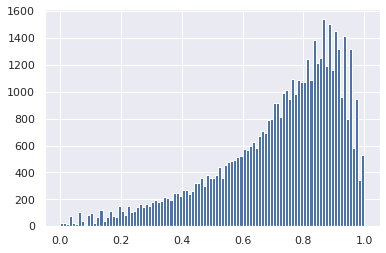

In [ ]:
plt.hist(loan_data_defaults['CCF'], bins = 100)

In [ ]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
21        0
24        1
26        0
27        1
46        1
50        1
53        1
55        0
64        1
66        1
68        1
71        1
97        1
100       1
105       1
114       1
120       1
121       1
124       1
131       0
137       1
145       1
151       1
153       0
155       0
168       1
175       1
176       1
177       1
179       0
182       1
183       1
188       1
195       1
203       1
204       0
212       1
220       0
224       1
225       1
226       1
231       1
251       1
255       1
266       1
270       1
273       1
278       0
299       1
300       1
301       1
304       1
313       0
314       1
317       1
318       0
324       0
328       1
339       1
340       1
344       0
348       1
356       0
362       1
365       1
376       1
380       1
381       1
388       1
412       1
414       0
422       1
424       1
430       1
433       1
435       1
458       1
462       1
464 

## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

## Preparing the Inputs

In [ ]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [ ]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [ ]:
# Keep only the variables we need for the model.
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [ ]:
# Removes the dummy variable reference categories.
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [ ]:
# Check for missing values.
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

## Estimating the Model

In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [ ]:
reg_lgd_st_1 = LogisticRegression_with_p_values()

# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = lgd_inputs_stage_1_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)

# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1

# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]

# Sorts the dataframe by index.
summary_table = summary_table.sort_index()

# Takes the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = reg_lgd_st_1.p_values

# Adds the value 'NaN' in the beginning of the variable with p-values.
p_values = np.append(np.nan,np.array(p_values))

summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept -4.412163e-04           NaN
1                               grade:A -2.500284e-05  9.997513e-01
2                               grade:B -2.003707e-04  9.975291e-01
3                               grade:C -3.283304e-04  9.957864e-01
4                               grade:D -1.070811e-04  9.986768e-01
5                               grade:E  3.183188e-05  9.996436e-01
6                               grade:F  1.635232e-04  9.984183e-01
7               home_ownership:MORTGAGE -6.554823e-05  9.977836e-01
8                   home_ownership:NONE  1.868962e-06  9.999981e-01
9                  home_ownership:OTHER  1.175186e-06  9.999979e-01
10                   home_ownership:OWN -5.108939e-05  9.989425e-01
11     verification_status:Not Verified -2.390629e-04  9.932362e-01
12  verification_status:Source Verified -5.464606e-04  9.826958e-01
13                          purpose:car  2.413763e-05  9.998286e-01
14           purpose:debt_consolidation -4.391120e-04  9.875558e-01
15                  purpose:educational  3.592230e-06  9.999917e-01
16             purpose:home_improvement  1.721297e-05  9.997430e-01
17                        purpose:house  1.699369e-05  9.999017e-01
18               purpose:major_purchase  2.442857e-05  9.997646e-01
19                      purpose:medical -9.626693e-07  9.999923e-01
20                       purpose:moving  5.512036e-06  9.999619e-01
21                        purpose:other  5.526119e-05  9.991182e-01
22             purpose:renewable_energy  7.100778e-06  9.999837e-01
23               purpose:small_business  1.080733e-04  9.987369e-01
24                     purpose:vacation  3.105110e-06  9.999825e-01
25                      purpose:wedding  3.174616e-05  9.998265e-01
26                initial_list_status:w -1.742342e-03  9.433170e-01
27                             term_int -1.354715e-02  5.710309e-09
28                       emp_length_int -1.990908e-03  4.849234e-01
29                   mths_since_issue_d  3.304156e-02  0.000000e+00
30          mths_since_earliest_cr_line -2.417172e-03  1.574448e-68
31                          funded_amnt  5.160412e-05  2.055522e-08
32                             int_rate -3.075668e-03  5.741367e-01
33                          installment -1.262984e-03  1.050909e-05
34                           annual_inc -7.518995e-07  1.675333e-02
35                                  dti -1.551699e-02  1.037571e-24
36                          delinq_2yrs -3.115725e-04  9.812925e-01
37                       inq_last_6mths  4.265805e-04  9.625988e-01
38               mths_since_last_delinq -3.315383e-03  2.653990e-12
39               mths_since_last_record -1.202349e-03  3.549856e-02
40                             open_acc -6.058792e-03  4.860610e-02
41                              pub_rec -1.070110e-04  9.976738e-01
42                            total_acc -1.232461e-02  1.520535e-19
43                       acc_now_delinq  8.715922e-07  9.999957e-01
44                     total_rev_hi_lim -1.050805e-06  7.882189e-02

## Testing the Model

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [ ]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [ ]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [ ]:
y_hat_test_proba_lgd_stage_1
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.48176306, 0.51823694],
       [0.48791054, 0.51208946],
       [0.5477936 , 0.4522064 ],
       ...,
       [0.56416658, 0.43583342],
       [0.32821718, 0.67178282],
       [0.61162574, 0.38837426]])

In [ ]:
# Takes only the probabilities for being 1.
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [ ]:
y_hat_test_proba_lgd_stage_1

array([0.51823694, 0.51208946, 0.4522064 , ..., 0.43583342, 0.67178282,
       0.38837426])

In [ ]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [ ]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [ ]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [ ]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [ ]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [ ]:
df_actual_predicted_probs.head()

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
72857                          0                      0.518237
105537                         0                      0.512089
228024                         1                      0.452206
403839                         0                      0.442829
324366                         0                      0.338332

## Estimating the Аccuracy of the Мodel

In [ ]:
tr = 0.5
# Creates a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [ ]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted     0     1
Actual               
0          3614  1674
1          2104  2802

In [ ]:
# Divides each value of the table by the total number of observations, thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.354522  0.164214
1          0.206396  0.274868

In [ ]:
# Calculates Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6293898371591132

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

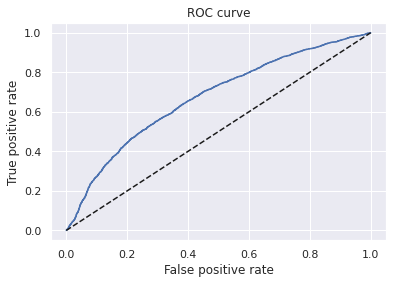

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6722063137977333

## Stage 2 – Linear Regression

In [ ]:
# Takes only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable created is equal to 1.
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [ ]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [ ]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [ ]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [ ]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [ ]:
reg_lgd_st_2 = LinearRegression()

# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression()

In [ ]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)

summary_table.index = summary_table.index + 1

summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]

summary_table = summary_table.sort_index()

p_values = reg_lgd_st_2.p

p_values = np.append(np.nan,np.array(p_values))

summary_table['p_values'] = p_values.round(3)

summary_table

Feature name  Coefficients  p_values
0                             Intercept  2.406858e-01       NaN
1                               grade:A -6.826892e-02     0.000
2                               grade:B -5.083556e-02     0.000
3                               grade:C -3.748066e-02     0.000
4                               grade:D -2.717310e-02     0.000
5                               grade:E -1.315941e-02     0.002
6                               grade:F -5.260168e-03     0.275
7               home_ownership:MORTGAGE  2.832212e-03     0.061
8                   home_ownership:NONE  1.459035e-01     0.000
9                  home_ownership:OTHER -9.475922e-03     0.644
10                   home_ownership:OWN  5.000678e-03     0.040
11     verification_status:Not Verified  1.056585e-03     0.553
12  verification_status:Source Verified -1.009915e-03     0.535
13                          purpose:car -2.995960e-03     0.634
14           purpose:debt_consolidation  8.206319e-05     0.965
15                  purpose:educational  7.625467e-02     0.000
16             purpose:home_improvement -3.702374e-03     0.273
17                        purpose:house -3.786803e-03     0.620
18               purpose:major_purchase  2.914439e-03     0.538
19                      purpose:medical  1.078825e-02     0.074
20                       purpose:moving  1.398692e-02     0.039
21                        purpose:other  4.841345e-03     0.109
22             purpose:renewable_energy  2.420645e-02     0.142
23               purpose:small_business  6.212343e-04     0.869
24                     purpose:vacation -3.002398e-03     0.731
25                      purpose:wedding  2.034853e-02     0.006
26                initial_list_status:w  1.464671e-02     0.000
27                             term_int  3.316229e-04     0.020
28                       emp_length_int  8.727462e-05     0.635
29                   mths_since_issue_d -1.521649e-03     0.000
30          mths_since_earliest_cr_line  3.418678e-05     0.000
31                          funded_amnt -2.186999e-07     0.699
32                             int_rate -2.544714e-03     0.000
33                          installment -1.037621e-05     0.557
34                           annual_inc  6.389841e-08     0.001
35                                  dti  1.775655e-04     0.069
36                          delinq_2yrs  1.757943e-03     0.050
37                       inq_last_6mths  1.274095e-03     0.018
38               mths_since_last_delinq -1.094747e-06     0.971
39               mths_since_last_record -5.558083e-05     0.181
40                             open_acc -1.196505e-03     0.000
41                              pub_rec  3.447322e-03     0.208
42                            total_acc  4.766629e-04     0.000
43                       acc_now_delinq  4.278394e-03     0.658
44                     total_rev_hi_lim  2.263456e-07     0.000

## Stage 2 – Linear Regression Evaluation

In [ ]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [ ]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [ ]:
lgd_inputs_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [ ]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [ ]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [ ]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [ ]:
# Calculates the correlation between actual and predicted values.
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

recovery_rate         0
recovery_rate       1.000000  0.307996
0                   0.307996  1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


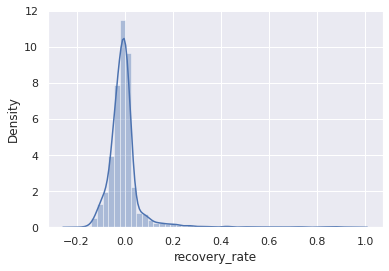

In [ ]:
# Plots the distribution of the residuals.
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

### Combining Stage 1 and Stage 2

In [ ]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [ ]:
y_hat_test_lgd_stage_2_all

array([0.10528475, 0.11246121, 0.08420139, ..., 0.12903419, 0.0851315 ,
       0.11519038])

In [ ]:
# Combines the predictions of the models from the two stages.
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

0
count  10194.000000
mean       0.041786
std        0.050043
min       -0.018973
25%        0.000000
50%        0.000000
75%        0.092919
max        0.168119

In [ ]:
# Sets predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

0
count  10194.000000
mean       0.041788
std        0.050041
min        0.000000
25%        0.000000
50%        0.000000
75%        0.092919
max        0.168119

# EAD Model

## Estimation and Interpretation

In [ ]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [ ]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [ ]:
ead_inputs_train = ead_inputs_train[features_all]

In [ ]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [ ]:
reg_ead = LinearRegression()

reg_ead.fit(ead_inputs_train, ead_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression()

In [ ]:
feature_name = ead_inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept  1.016513e+00           NaN
1                               grade:A -2.870946e-01  0.000000e+00
2                               grade:B -2.312636e-01  0.000000e+00
3                               grade:C -1.668960e-01  0.000000e+00
4                               grade:D -1.210663e-01  1.970202e-12
5                               grade:E -7.070544e-02  1.918578e-03
6                               grade:F -2.240835e-02  2.748685e-01
7               home_ownership:MORTGAGE -6.402923e-03  6.050271e-02
8                   home_ownership:NONE  1.000361e-01  9.092582e-05
9                  home_ownership:OTHER -3.509201e-02  6.436926e-01
10                   home_ownership:OWN -4.755597e-04  3.963089e-02
11     verification_status:Not Verified  1.518602e-03  5.528332e-01
12  verification_status:Source Verified  1.051796e-02  5.354622e-01
13                          purpose:car  2.510895e-04  6.340924e-01
14           purpose:debt_consolidation  1.340318e-02  9.646959e-01
15                  purpose:educational  9.801298e-02  5.368894e-09
16             purpose:home_improvement  1.733874e-02  2.729279e-01
17                        purpose:house  2.262053e-02  6.200015e-01
18               purpose:major_purchase  2.915748e-02  5.376877e-01
19                      purpose:medical  4.935942e-02  7.391253e-02
20                       purpose:moving  4.364563e-02  3.865040e-02
21                        purpose:other  3.616020e-02  1.089028e-01
22             purpose:renewable_energy  9.296137e-02  1.423251e-01
23               purpose:small_business  5.362038e-02  8.692143e-01
24                     purpose:vacation  3.572601e-02  7.311861e-01
25                      purpose:wedding  4.597169e-02  5.539872e-03
26                initial_list_status:w  9.936894e-03  4.662937e-15
27                             term_int  4.946488e-03  2.042660e-02
28                       emp_length_int -1.494054e-03  6.350976e-01
29                   mths_since_issue_d -3.797329e-03  0.000000e+00
30          mths_since_earliest_cr_line -4.193841e-05  1.087757e-04
31                          funded_amnt  2.097159e-06  6.992397e-01
32                             int_rate -1.026556e-02  1.887379e-14
33                          installment -7.084651e-05  5.568684e-01
34                           annual_inc -4.208095e-08  1.308549e-03
35                                  dti  3.411767e-04  6.897933e-02
36                          delinq_2yrs -1.151110e-03  5.043858e-02
37                       inq_last_6mths  1.103226e-02  1.819423e-02
38               mths_since_last_delinq -2.174472e-04  9.708935e-01
39               mths_since_last_record -4.266418e-05  1.809354e-01
40                             open_acc -2.047943e-03  1.365854e-09
41                              pub_rec  4.860248e-03  2.079574e-01
42                            total_acc  5.227289e-04  5.133116e-08
43                       acc_now_delinq  1.524454e-02  6.583494e-01
44                     total_rev_hi_lim  1.766304e-07  2.592628e-08

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept  1.016513e+00           NaN
1                               grade:A -2.870946e-01  0.000000e+00
2                               grade:B -2.312636e-01  0.000000e+00
3                               grade:C -1.668960e-01  0.000000e+00
4                               grade:D -1.210663e-01  0.000000e+00
5                               grade:E -7.070544e-02  0.000000e+00
6                               grade:F -2.240835e-02  1.139633e-03
7               home_ownership:MORTGAGE -6.402923e-03  1.369733e-03
8                   home_ownership:NONE  1.000361e-01  1.354058e-01
9                  home_ownership:OTHER -3.509201e-02  2.717544e-01
10                   home_ownership:OWN -4.755597e-04  8.839335e-01
11     verification_status:Not Verified  1.518602e-03  5.226720e-01
12  verification_status:Source Verified  1.051796e-02  8.708844e-07
13                          purpose:car  2.510895e-04  9.783972e-01
14           purpose:debt_consolidation  1.340318e-02  2.356739e-08
15                  purpose:educational  9.801298e-02  4.655507e-06
16             purpose:home_improvement  1.733874e-02  1.218466e-04
17                        purpose:house  2.262053e-02  4.765063e-02
18               purpose:major_purchase  2.915748e-02  2.270867e-05
19                      purpose:medical  4.935942e-02  3.912275e-09
20                       purpose:moving  4.364563e-02  4.999614e-06
21                        purpose:other  3.616020e-02  0.000000e+00
22             purpose:renewable_energy  9.296137e-02  1.272525e-03
23               purpose:small_business  5.362038e-02  0.000000e+00
24                     purpose:vacation  3.572601e-02  2.793443e-03
25                      purpose:wedding  4.597169e-02  1.010098e-04
26                initial_list_status:w  9.936894e-03  1.995719e-06
27                             term_int  4.946488e-03  0.000000e+00
28                       emp_length_int -1.494054e-03  6.011029e-10
29                   mths_since_issue_d -3.797329e-03  0.000000e+00
30          mths_since_earliest_cr_line -4.193841e-05  2.545831e-04
31                          funded_amnt  2.097159e-06  6.974798e-03
32                             int_rate -1.026556e-02  0.000000e+00
33                          installment -7.084651e-05  3.476233e-03
34                           annual_inc -4.208095e-08  1.087162e-01
35                                  dti  3.411767e-04  7.481786e-03
36                          delinq_2yrs -1.151110e-03  3.042514e-01
37                       inq_last_6mths  1.103226e-02  0.000000e+00
38               mths_since_last_delinq -2.174472e-04  5.937676e-08
39               mths_since_last_record -4.266418e-05  3.788842e-01
40                             open_acc -2.047943e-03  1.998401e-15
41                              pub_rec  4.860248e-03  1.172045e-01
42                            total_acc  5.227289e-04  4.758714e-06
43                       acc_now_delinq  1.524454e-02  2.721126e-01
44                     total_rev_hi_lim  1.766304e-07  3.536515e-04

## Model Validation

In [ ]:
ead_inputs_test = ead_inputs_test[features_all]

In [ ]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [ ]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [ ]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [ ]:
ead_targets_test_temp = ead_targets_test

In [ ]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [ ]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

CCF         0
CCF  1.000000  0.503949
0    0.503949  1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


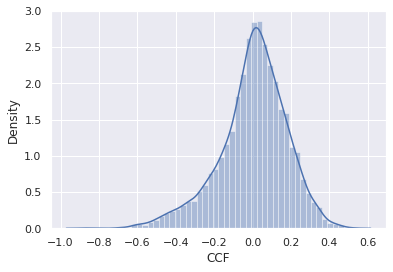

In [ ]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [ ]:
pd.DataFrame(y_hat_test_ead).describe()

0
count  10194.000000
mean       0.720169
std        0.102154
min        0.371834
25%        0.644599
50%        0.713604
75%        0.796044
max        1.032799

In [ ]:
# Sets predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [ ]:
pd.DataFrame(y_hat_test_ead).describe()

0
count  10194.000000
mean       0.720165
std        0.102144
min        0.371834
25%        0.644599
50%        0.713604
75%        0.796044
max        1.000000

# Expected Loss

In [455]:
loan_data_defaults_copy = loan_data_defaults.copy()

In [465]:
loan_data_defaults_copy.shape

(50968, 213)

In [456]:
loan_data_defaults_copy['EAD'] = loan_data_defaults_copy['CCF'] * loan_data_defaults_copy['funded_amnt']

In [458]:
loan_data_defaults_copy['EAD'].describe()

count    50968.000000
mean     10781.563112
std       7403.934464
min          0.000000
25%       4883.780000
50%       9141.365000
75%      15205.140000
max      35000.000000
Name: EAD, dtype: float64

In [461]:
loan_data_defaults_copy['LGD'] = 1 - loan_data_defaults_copy['recovery_rate']

In [462]:
loan_data_defaults_copy['LGD'].describe()

count    50968.000000
mean         0.948449
std          0.085001
min          0.000000
25%          0.898227
50%          1.000000
75%          1.000000
max          1.000000
Name: LGD, dtype: float64

In [464]:
PD___ = reg2.model.predict_proba(inputs_test)[: ][: , 0]

In [467]:
# Calculates Expected Loss: EL = PD * LGD * EAD.
loan_data_defaults_copy['EL'] = PD___.mean() * loan_data_defaults_copy['LGD'] * loan_data_defaults_copy['EAD']

In [468]:
loan_data_defaults_copy['EL'].describe()

count    50968.000000
mean      1109.342746
std        758.684199
min          0.000000
25%        506.163640
50%        945.490271
75%       1558.408760
max       3825.632315
Name: EL, dtype: float64

In [470]:
loan_data_defaults_copy[['funded_amnt', 'LGD', 'EAD', 'EL']].head()

funded_amnt       LGD      EAD          EL
1          2500  0.953168  2043.54  212.905941
8          5600  0.966239  5437.98  574.324681
9          5375  0.949900  4701.52  488.147586
12         9000  0.950633  7743.86  804.647589
14        10000  0.935490  4566.53  466.939536

In [472]:
loan_data_defaults_copy['funded_amnt'].describe()

count    50968.000000
mean     14551.695181
std       8356.850344
min        500.000000
25%       8000.000000
50%      12650.000000
75%      20000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [473]:
# Total Expected Loss for all loans.
loan_data_defaults_copy['EL'].sum()

56540981.090862356

In [476]:
# Total funded amount for all loans.
loan_data['funded_amnt'].sum()

6664052450

In [475]:
# Expected loss as a percentage of total funded
loan_data_defaults_copy['EL'].sum()/loan_data['funded_amnt'].sum()

0.008484474201709256